<a href="https://colab.research.google.com/github/ZakariaSoukrat/SkyForcasters/blob/main/Projet_AAA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [ ]:
#import of necessary libraries
# sci libraries
import numpy as np
import pandas as pd
import math as m

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#model
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
#preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures

#metrics and validation
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, train_test_split

#Data exploration using visualizations, statistics

In [ ]:
#Read in Data

# Read the CSV file into a DataFrame
data = pd.read_csv("https://raw.githubusercontent.com/ZakariaSoukrat/SkyForcasters/3720e6ecef10a640574d10c9b9e964f69dc213c1/Clean_Dataset.csv")

#data infiormation
print(data.info())
print()
print(data.describe())
print()
# Display the DataFrame
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None

          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.00

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
data.shape

(300153, 12)

We can see that Data set contains 12 colums and 300153 samples :    
The Dataset has enough samples for training and testing ❎

The colums 0 and flight don't have any influence on the price, so we will drop them ❌


In [ ]:
#Drop non useful colums
data=data.drop(["Unnamed: 0"],axis=1)
data=data.drop(["flight"],axis=1)
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


we can see that the currency used is not dollar or euro (since the price range is 1105-123071), since the dataSet only includes flights in india we suppose that the devise used is the Indian Rupee,
we know that 1 euro = 91.22 Indian Rupee, we will change that in the Dataset

In [ ]:
# #change the currency to euro
# data['price']=data['price']/91.22

In [ ]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
# Check for missing values
print(data.isnull().sum())


airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


we have no missing values ✅

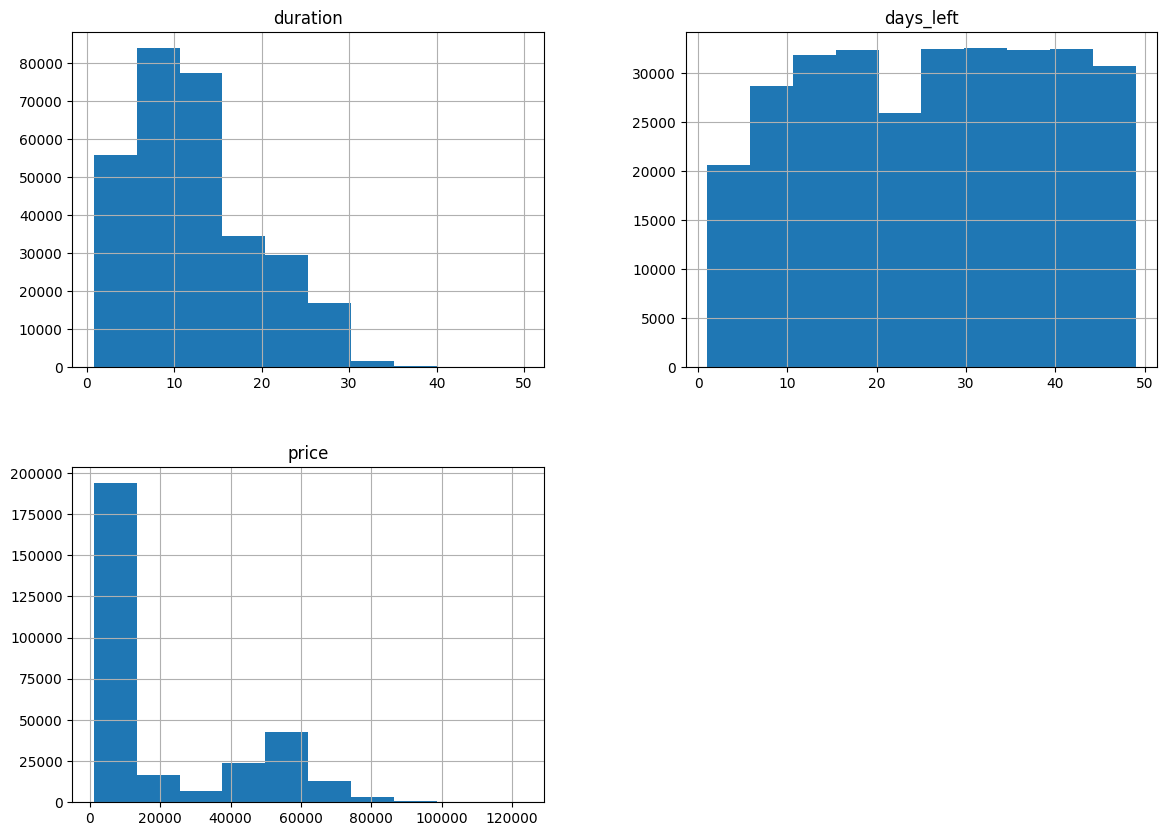

In [ ]:
data.hist(bins=10,figsize=(14,10))
plt.show();

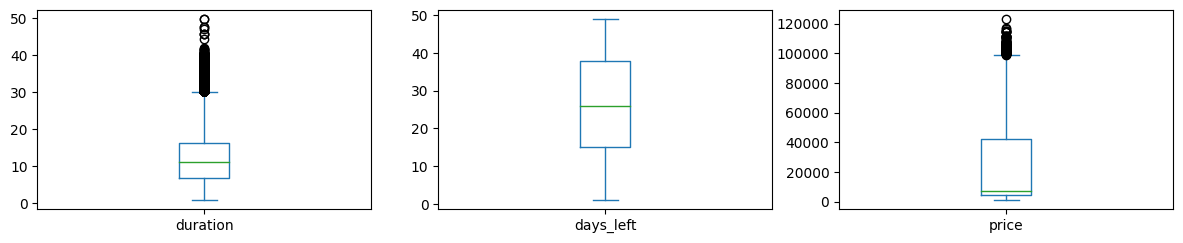

In [ ]:
data.plot(kind ="box",subplots=True,figsize=(25,15),layout=(5,5));

we can see that we have an uniform distribution for days_left between 1 and 49

most of the flights take 5h to 15h, this is due to the stops that are included in the flight duration (all the flights are in India and we can see flights that take 49h)

the prices are mostly between 13 and 200 euros, which is normal since most of the airlines in India are considerated as low cost

In [ ]:
# Display unique values for categorical columns
categorical_cols = ['airline', 'class', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops']
for col in categorical_cols:
    print(col, data[col].unique())



airline ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
class ['Economy' 'Business']
source_city ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
destination_city ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
departure_time ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
arrival_time ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
stops ['zero' 'one' 'two_or_more']


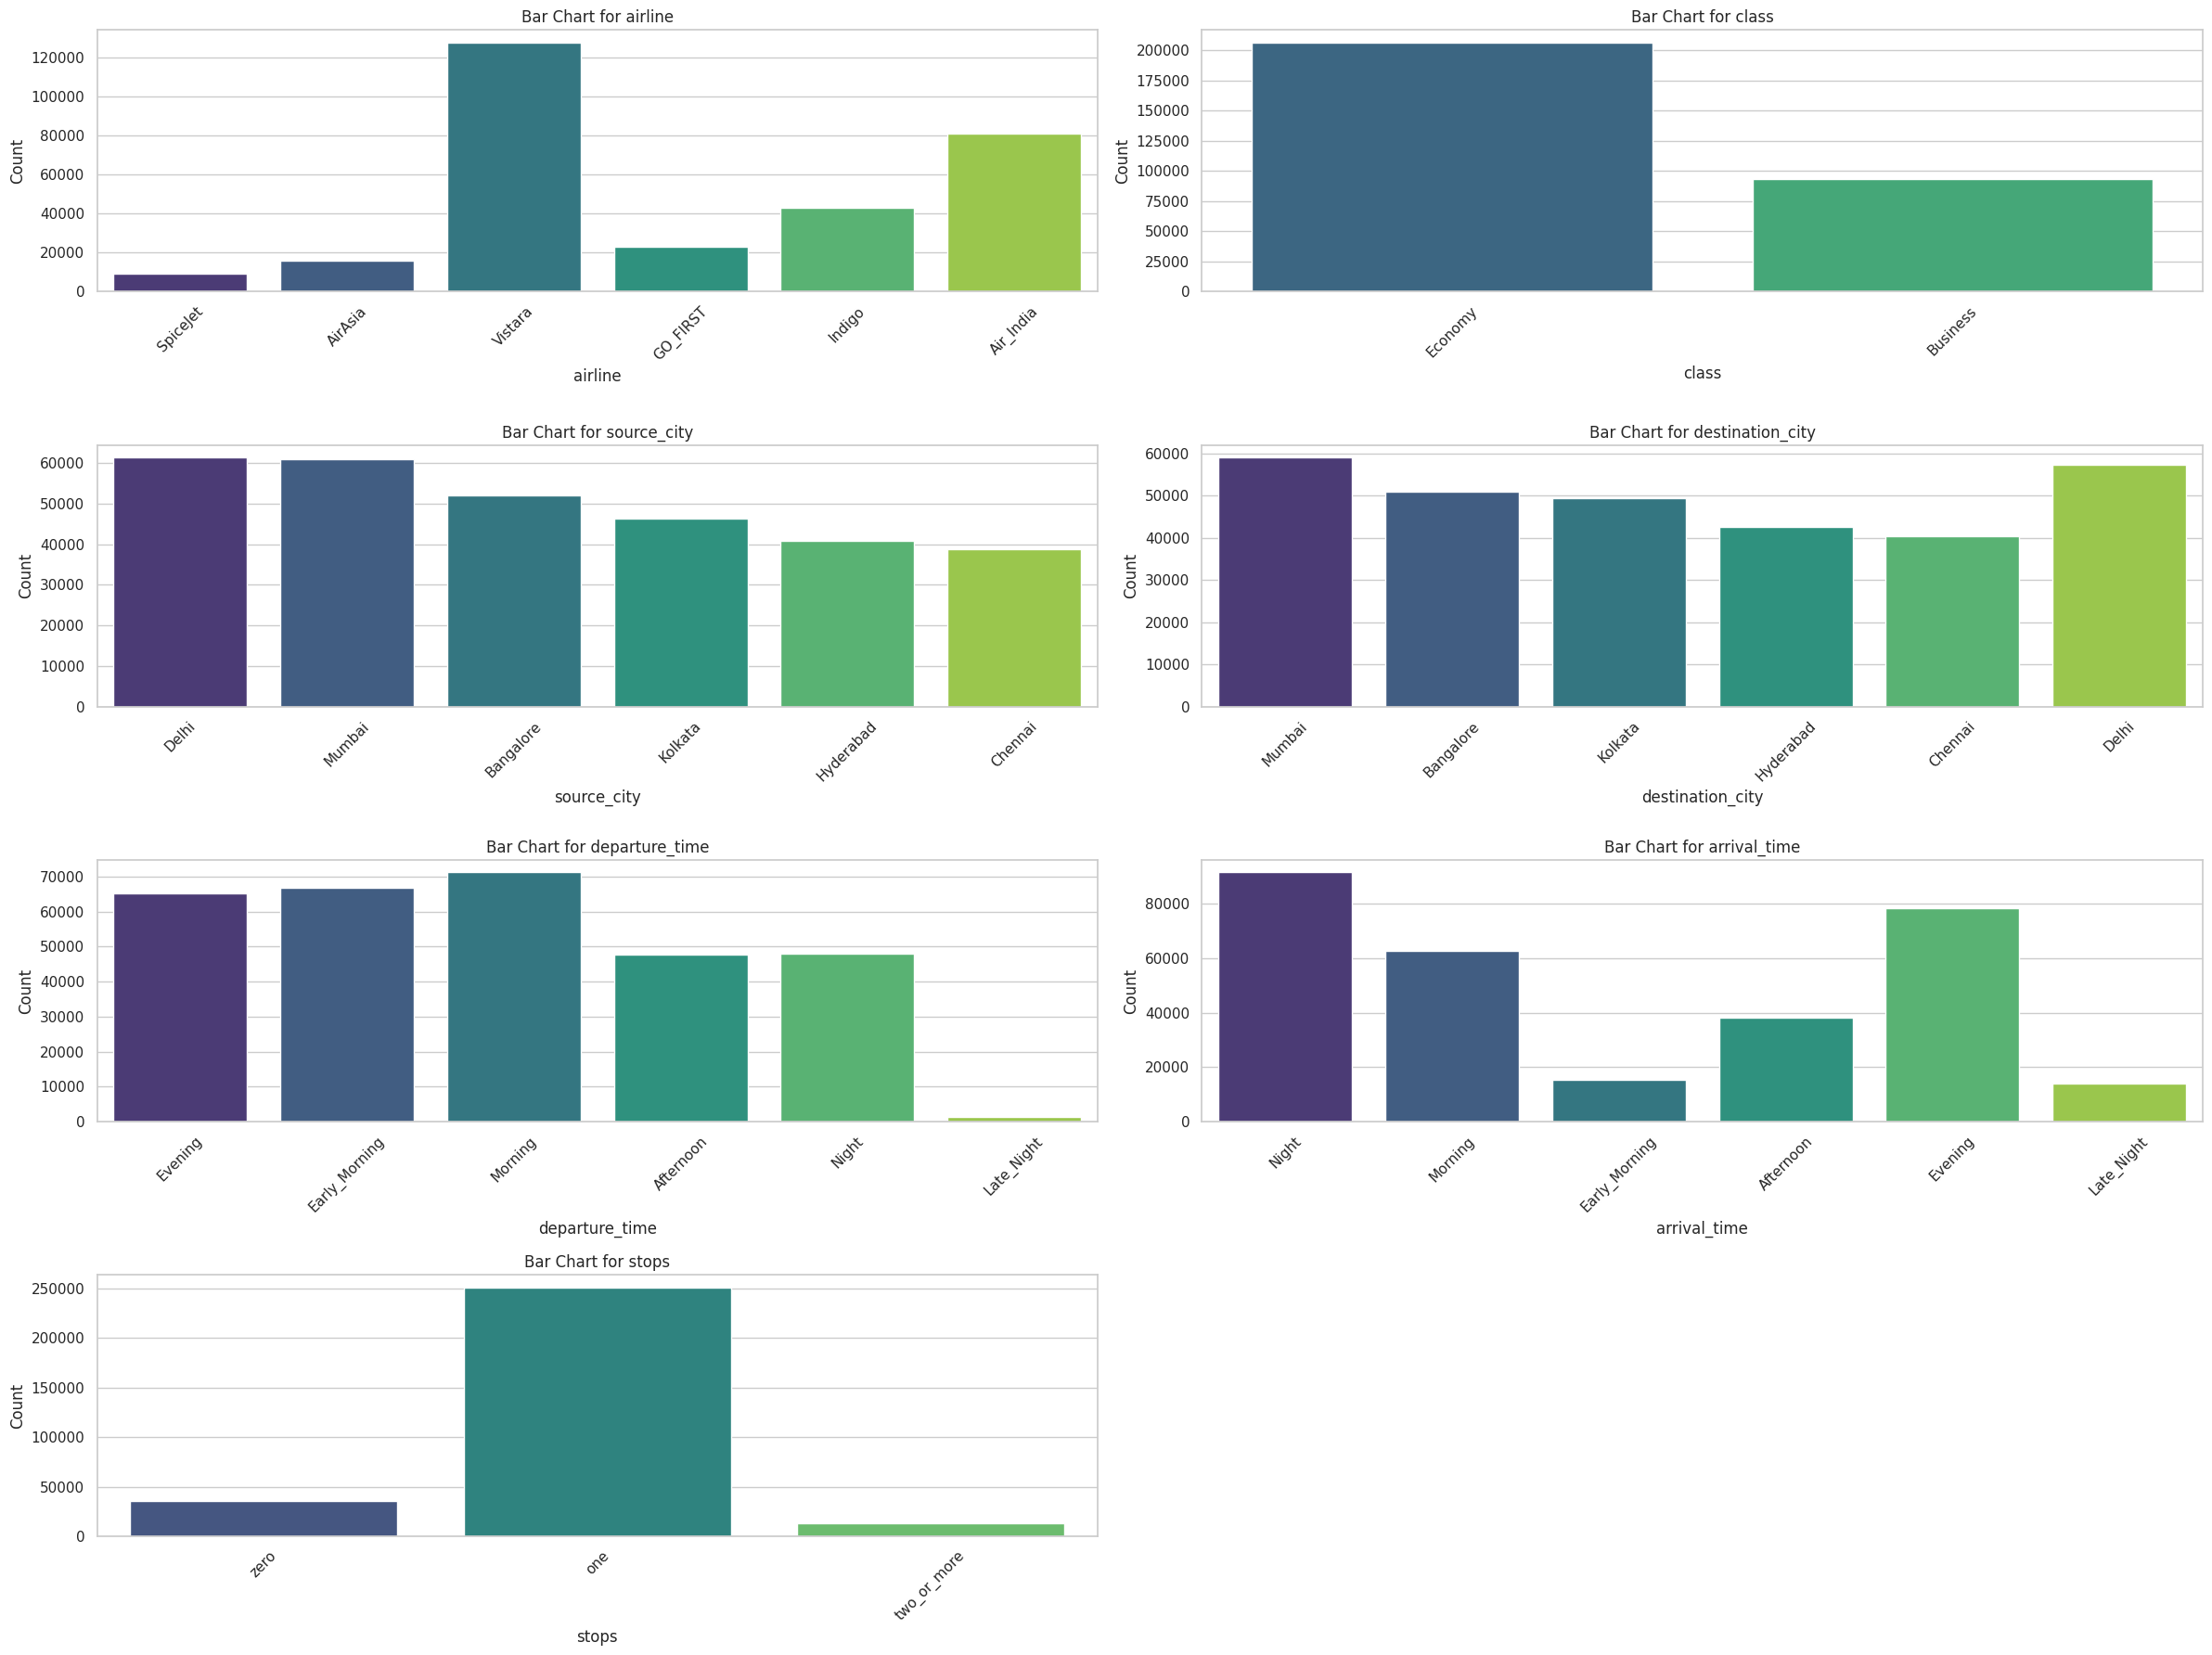

In [ ]:
import math
num_cols = len(categorical_cols)
num_rows = math.ceil(num_cols / 2)  # Adjust the number of columns per row here

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for all categorical columns
plt.figure(figsize=(24, 18))
for i, column in enumerate(categorical_cols):
    plt.subplot(num_rows, 2, i+1)
    sns.countplot(data=data, x=column, palette="viridis")
    plt.title(f'Bar Chart for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()
plt.show()

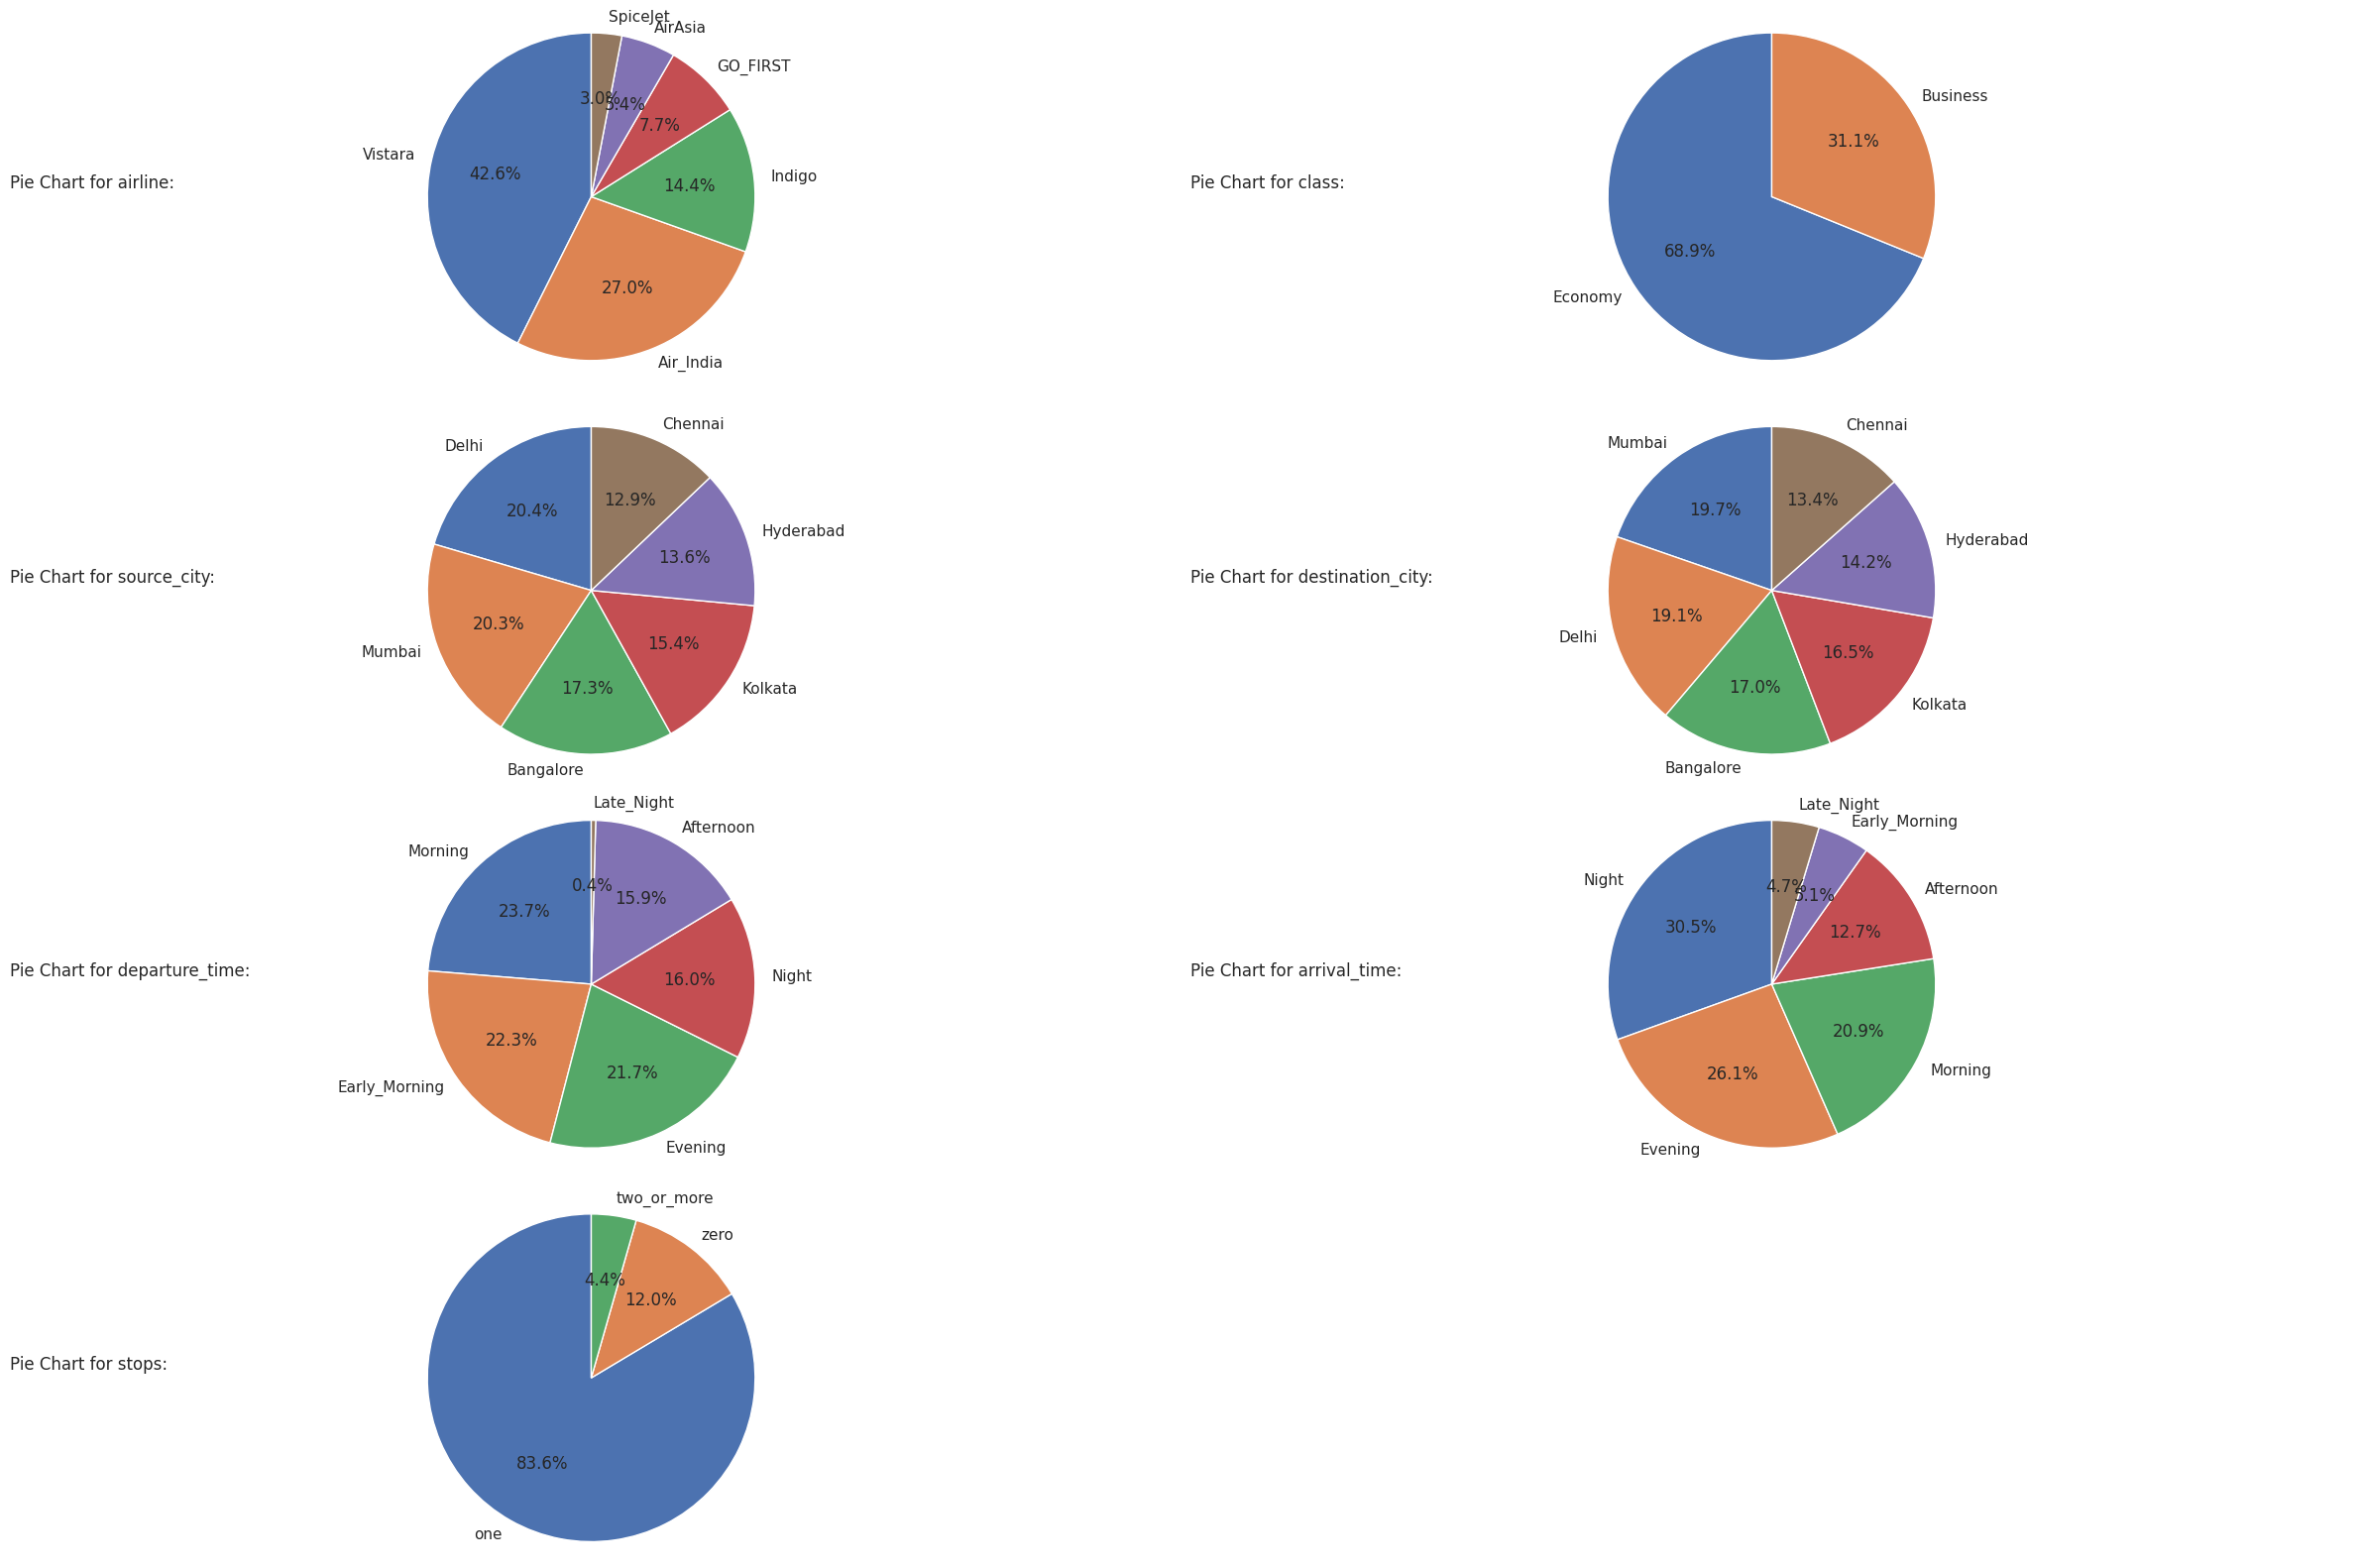

In [ ]:
num_cols = 2  # Set the number of columns for the subplots
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols

# Create subplots for pie charts
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 16))
fig.subplots_adjust(hspace=3)

# Flatten axes if there's only one row
if num_rows == 1:
    axes = [axes]

# Plot pie charts for each categorical column
for i, column in enumerate(categorical_cols):
    ax = axes[i // num_cols][i % num_cols]
    data[column].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Pie Chart for {column}:', y=0.5, loc="left")
    ax.set_ylabel('')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Hide empty subplots
for i in range(len(categorical_cols), num_rows * num_cols):
    ax = axes[i // num_cols][i % num_cols]
    ax.axis('off')

plt.tight_layout()
plt.show()

We can see that most of the flights are Economy calss, it justifies that the prices are relatively lows

We also notice that flights mostly have a stop which justify the durations of the flighs

Vistara and Air_India have the biggest market parts with 42,6% and 27%

#Correlation


#Class

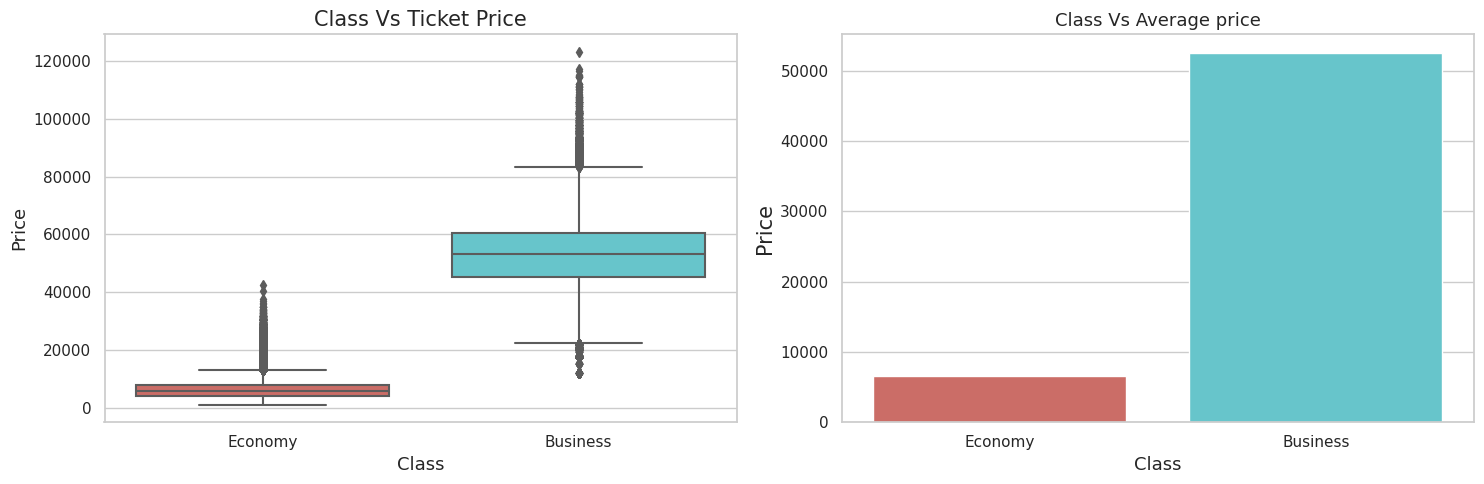

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot: Stops Vs Ticket Price
sns.boxplot(x='class', y='price', data=data, palette='hls', ax=axs[0])
axs[0].set_title('Class Vs Ticket Price', fontsize=15)
axs[0].set_xlabel('Class', fontsize=13)
axs[0].set_ylabel('Price', fontsize=13)

# Barplot: Stops Vs Ticket Price
sns.barplot(data=data, x='class', y='price',  palette='hls', errorbar=None,ax=axs[1])
axs[1].set_title('Class Vs Average price', fontsize=13)
axs[1].set_xlabel('Class', fontsize=13)
axs[1].set_ylabel('Price', fontsize=15)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

we can see that class buisness is sharply more expensive than class economy, which is normal.

#Airline

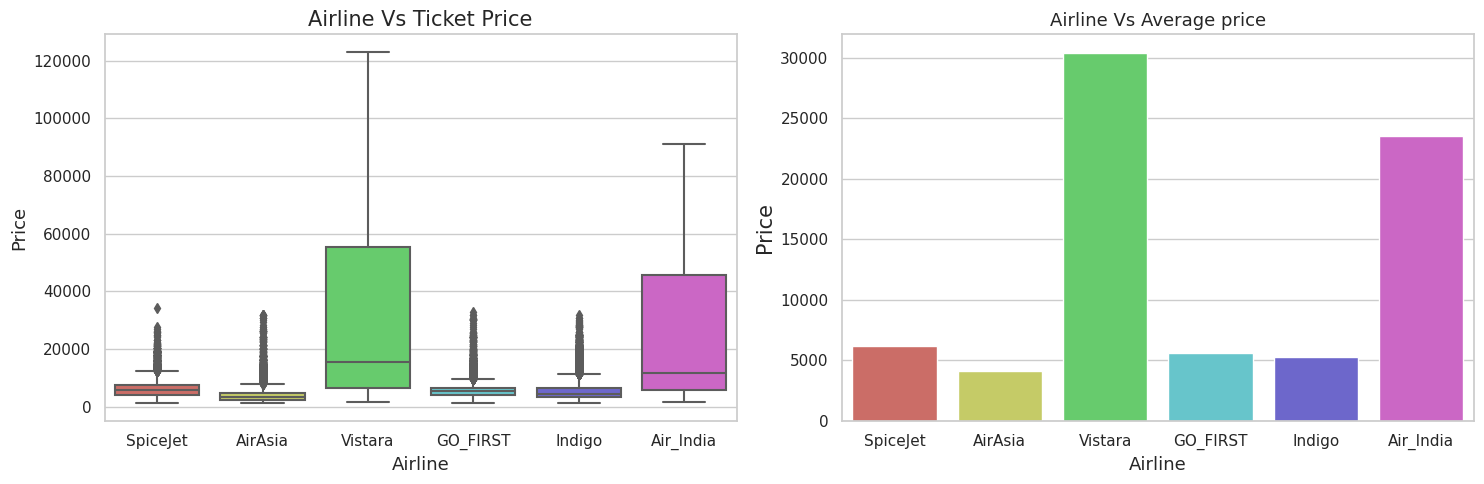

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot: Stops Vs Ticket Price
sns.boxplot(x='airline', y='price', data=data, palette='hls', ax=axs[0])
axs[0].set_title('Airline Vs Ticket Price', fontsize=15)
axs[0].set_xlabel('Airline', fontsize=13)
axs[0].set_ylabel('Price', fontsize=13)

# Barplot: Stops Vs Ticket Price
sns.barplot(data=data, x='airline', y='price',  palette='hls', errorbar=None,ax=axs[1])
axs[1].set_title('Airline Vs Average price', fontsize=13)
axs[1].set_xlabel('Airline', fontsize=13)
axs[1].set_ylabel('Price', fontsize=15)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

we can see that Vistara and Air India are more expensive then other airlines, that is due to :    

*   Only Vistara and Air India offer buisness trips
*   The remaining airlines are considered as low cost (even in economy vistara and air india are more expensive: graph bellow)




<Axes: xlabel='airline', ylabel='price'>

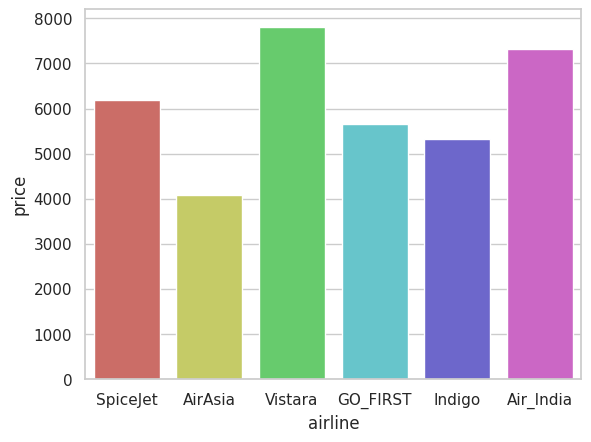

In [ ]:
data_economy = data[data['class'] == 'Economy']
sns.barplot(data=data_economy, x='airline', y='price',  palette='hls', errorbar=None)


#Stops

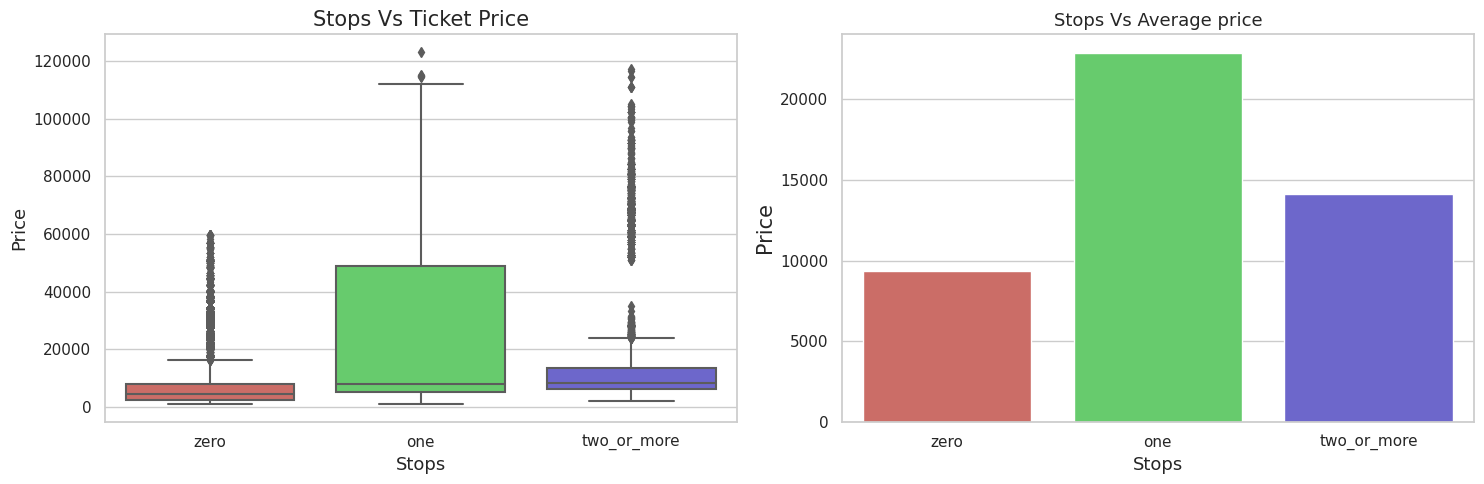

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot: Stops Vs Ticket Price
sns.boxplot(x='stops', y='price', data=data, palette='hls', ax=axs[0])
axs[0].set_title('Stops Vs Ticket Price', fontsize=15)
axs[0].set_xlabel('Stops', fontsize=13)
axs[0].set_ylabel('Price', fontsize=13)

# Barplot: Stops Vs Ticket Price
sns.barplot(data=data, x='stops', y='price',  palette='hls', errorbar=None,ax=axs[1])
axs[1].set_title('Stops Vs Average price', fontsize=13)
axs[1].set_xlabel('Stops', fontsize=13)
axs[1].set_ylabel('Price', fontsize=15)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

we can see that in average a flight without stops is cheaper, and that one stop is the most expensive.

#Departure Time

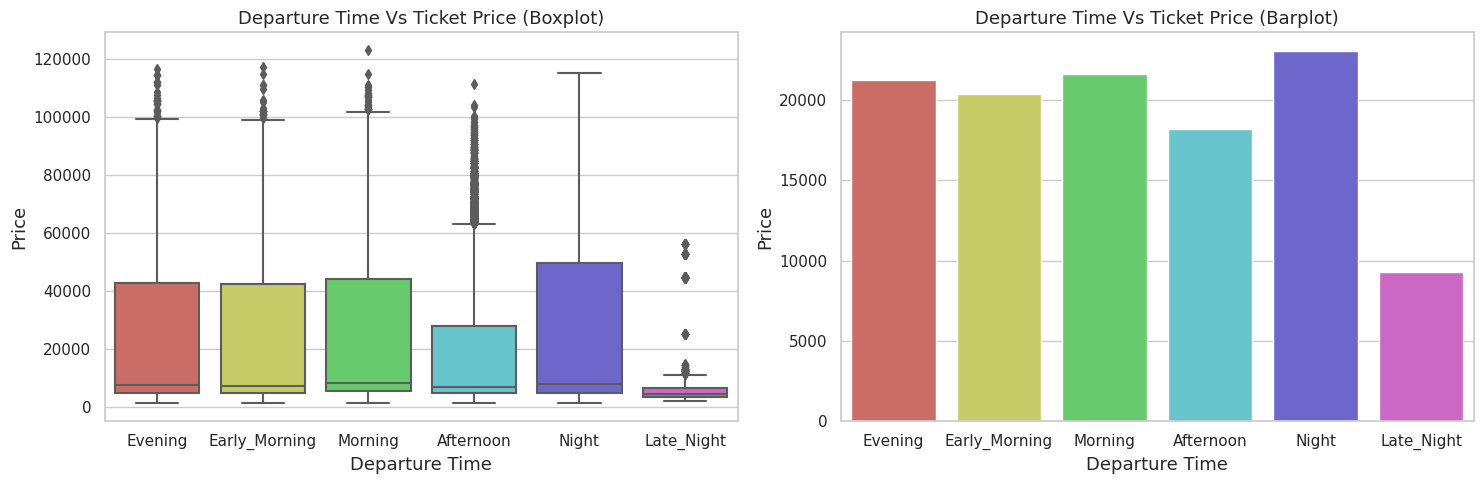

In [ ]:
# Displays price comparison at departure time and arrival time
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot: Departure Time Vs Ticket Price
sns.boxplot(x='departure_time', y='price', data=data, palette='hls', ax=axs[0])
axs[0].set_title('Departure Time Vs Ticket Price (Boxplot)', fontsize=13)
axs[0].set_xlabel('Departure Time', fontsize=13)
axs[0].set_ylabel('Price', fontsize=13)

# Barplot: Departure Time Vs Ticket Price
sns.barplot(x='departure_time', y='price', data=data, palette='hls',errorbar=None, ax=axs[1])
axs[1].set_title('Departure Time Vs Ticket Price (Barplot)', fontsize=13)
axs[1].set_xlabel('Departure Time', fontsize=13)
axs[1].set_ylabel('Price', fontsize=13)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()




we can see that the flights that depart at late night are cheaper compared to other time zones

#Arrival Time

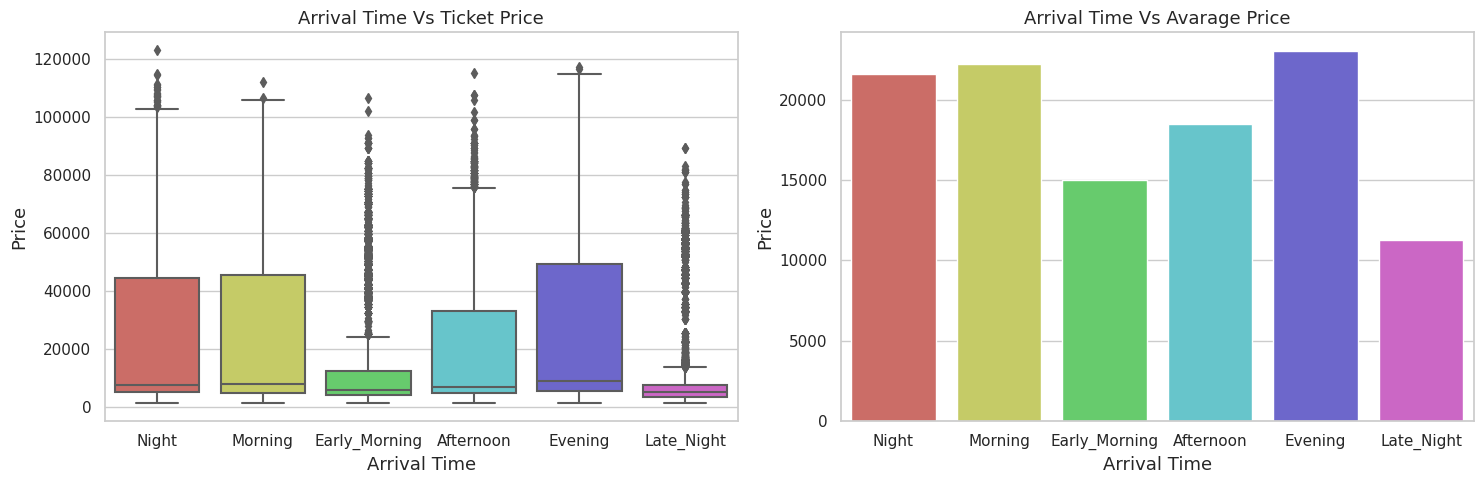

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot: Arrival Time Vs Ticket Price
sns.boxplot(x='arrival_time', y='price', data=data, palette='hls', ax=axs[0])
axs[0].set_title('Arrival Time Vs Ticket Price', fontsize=13)
axs[0].set_xlabel('Arrival Time', fontsize=13)
axs[0].set_ylabel('Price', fontsize=13)

# Barplot: Arrival Time Vs Ticket Price
sns.barplot(x='arrival_time', y='price', data=data, palette='hls',errorbar=None, ax=axs[1])
axs[1].set_title('Arrival Time Vs Avarage Price', fontsize=13)
axs[1].set_xlabel('Arrival Time', fontsize=13)
axs[1].set_ylabel('Price', fontsize=13)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

we can see that the flights arriving at late night are cheaper compared to other time zones.
now we will see the combination of the two factors:

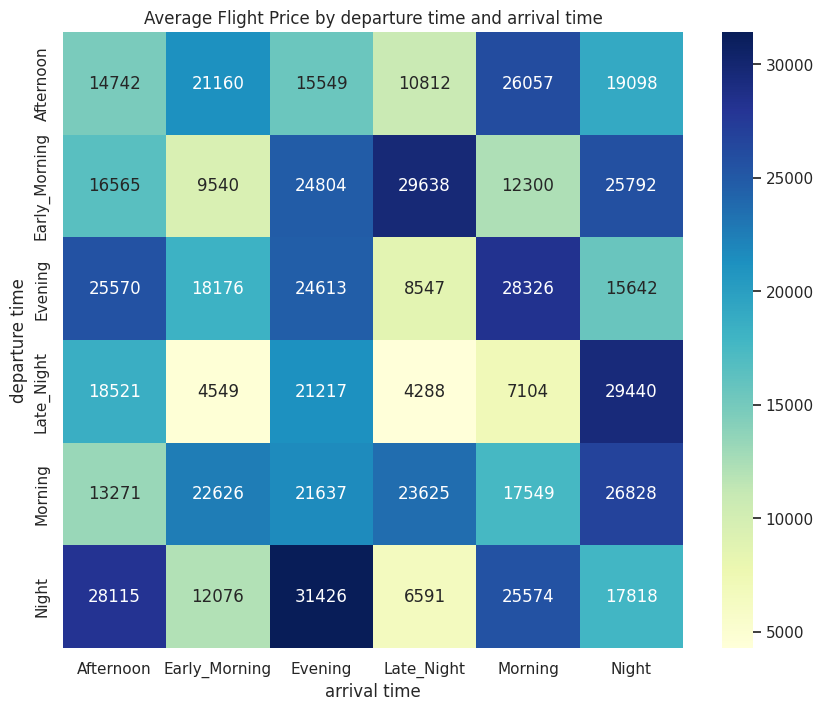

In [ ]:
#pivot_table: a quantitative table that summarizes a large DataFrame, such as a large dataset
data_to_show = pd.pivot_table(data, values='price', index='departure_time', columns='arrival_time', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(data_to_show, cmap='YlGnBu', annot=True, fmt=".0f", cbar=True)

plt.title('Average Flight Price by departure time and arrival time')
plt.xlabel('arrival time')
plt.ylabel('departure time')

plt.show()

#Days Left

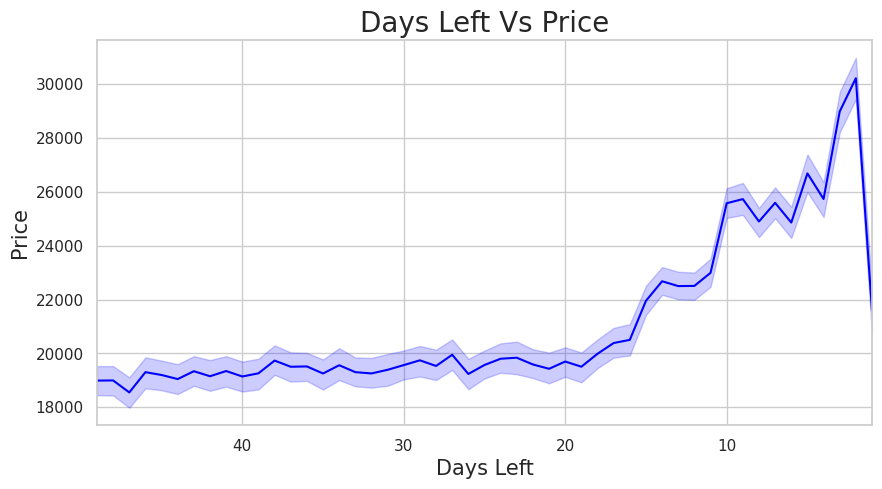

In [ ]:
# Shows the effect of the days left of flights on the price.
plt.figure(figsize=(10,5))
sns.lineplot(data=data, x='days_left', y='price', color='blue')
plt.title('Days Left Vs Price', fontsize=20)
plt.xlabel('Days Left', fontsize=15)
plt.ylabel('Price', fontsize=15)

# Reverse the x-axis (days_left)
plt.xlim(data['days_left'].max(), data['days_left'].min())

plt.show()

we can see that overall, prices increase as we get closer to the day of the flight, however in the last day we see that a big decrease of the prices,indeed airlines sells less expensively so as not to leave empty seats

#Duration

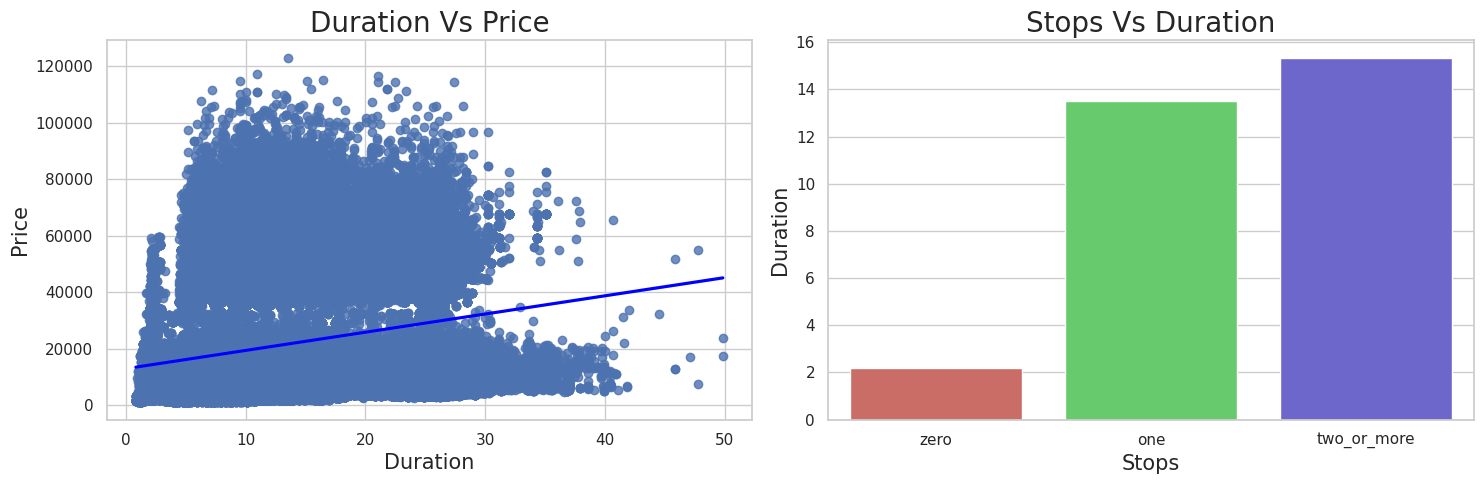

In [ ]:
# Shows the effect of the duration of flights on the price.
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Regression plot (Duration vs Price)
sns.regplot(x='duration', y='price', data=data, line_kws={'color': 'blue'}, ax=axs[0])
axs[0].set_title('Duration Vs Price', fontsize=20)
axs[0].set_xlabel('Duration', fontsize=15)
axs[0].set_ylabel('Price', fontsize=15)

# Plot 2: Barplot (Stops vs Duration)
sns.barplot(data=data, x='stops', y='duration', palette='hls', ax=axs[1], errorbar=None)
axs[1].set_title('Stops Vs Duration', fontsize=20)
axs[1].set_xlabel('Stops', fontsize=15)
axs[1].set_ylabel('Duration', fontsize=15)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


we can not see a clear  correlation between the duration and the prices
However the sceond graph confirm that the duration of the flight includes duration of stops, since flight with zero stop take on average 12h less than flights with two_or_more stops

#Source and destination cities

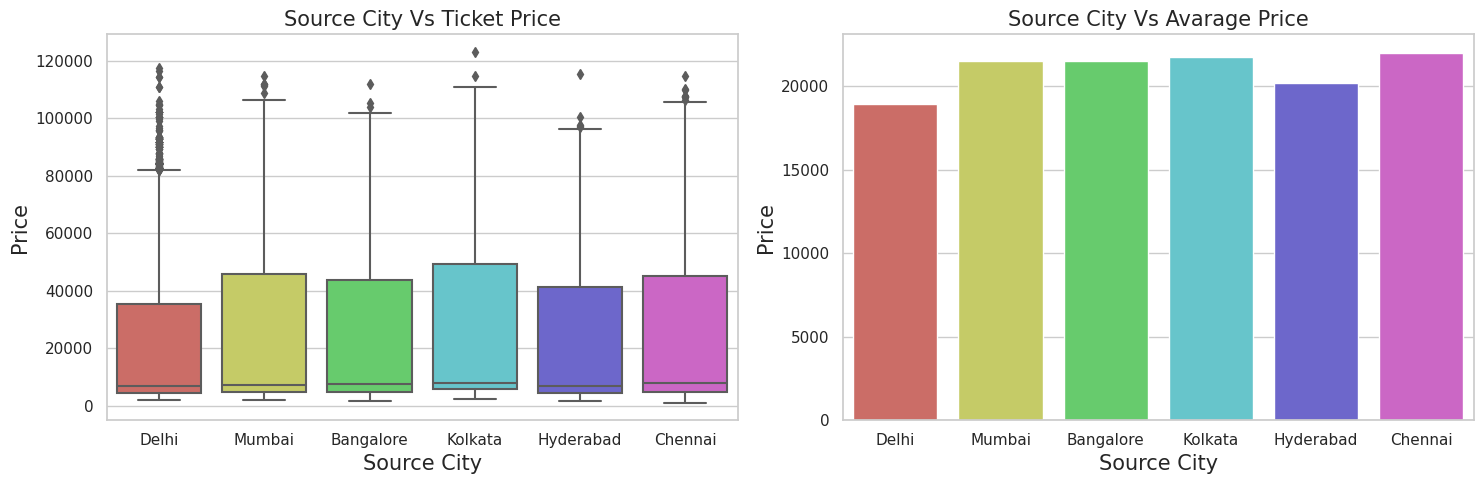

In [ ]:
# Displays a price comparison in the destination city and source city
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot: Source City Vs Ticket Price
sns.boxplot(x='source_city', y='price', data=data, palette='hls', ax=axs[0])
axs[0].set_title('Source City Vs Ticket Price', fontsize=15)
axs[0].set_xlabel('Source City', fontsize=15)
axs[0].set_ylabel('Price', fontsize=15)

# Barplot: Source City Vs Ticket Price
sns.barplot(x='source_city', y='price', data=data, palette='hls',errorbar=None, ax=axs[1])
axs[1].set_title('Source City Vs Avarage Price', fontsize=15)
axs[1].set_xlabel('Source City', fontsize=15)
axs[1].set_ylabel('Price', fontsize=15)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()




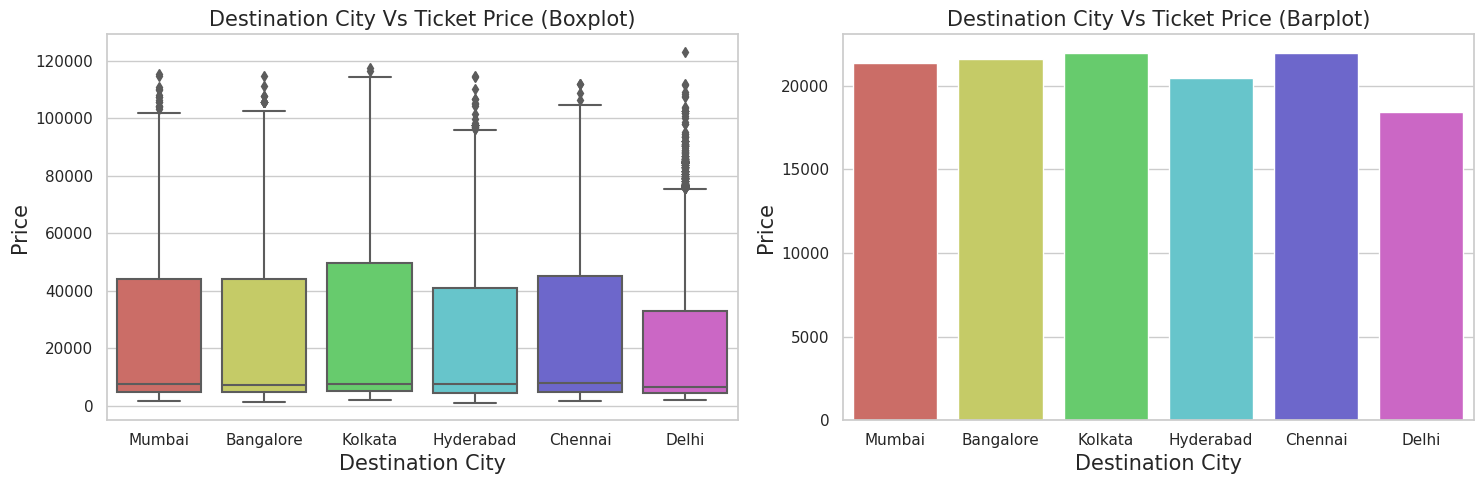

In [ ]:

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot: Destination City Vs Ticket Price
sns.boxplot(x='destination_city', y='price', data=data, palette='hls', ax=axs[0])
axs[0].set_title('Destination City Vs Ticket Price (Boxplot)', fontsize=15)
axs[0].set_xlabel('Destination City', fontsize=15)
axs[0].set_ylabel('Price', fontsize=15)

# Barplot: Destination City Vs Ticket Price
sns.barplot(x='destination_city', y='price', data=data, palette='hls',errorbar=None, ax=axs[1])
axs[1].set_title('Destination City Vs Ticket Price (Barplot)', fontsize=15)
axs[1].set_xlabel('Destination City', fontsize=15)
axs[1].set_ylabel('Price', fontsize=15)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

we can see that neither departure city or destination city has a significant impact on the price
Let's see the combanation of departure city or destination city

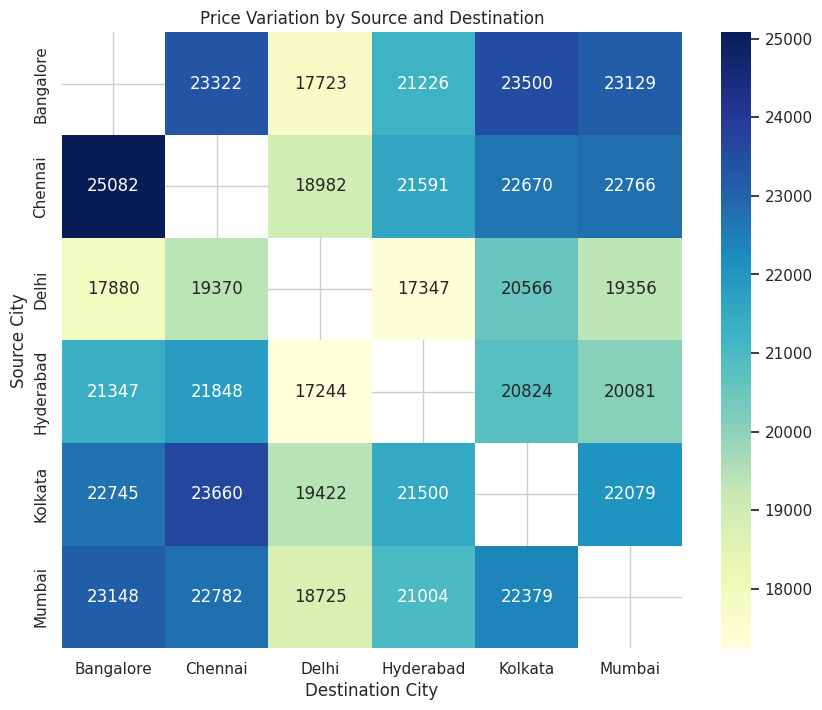

In [ ]:
pivot_table = data.pivot_table(index='source_city', columns='destination_city', values='price', aggfunc=np.mean)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.xlabel('Destination City')
plt.ylabel('Source City')
plt.title('Price Variation by Source and Destination')
plt.show()

we can see that the combination of source destination on the price, for exemple on average flights from chennai to bangalore are more exepensive by more than 6000 Rupee compared to flights from chennai to Delhi

In [ ]:
from IPython.display import Image
image_url = 'https://www.mapsofindia.com/maps/india/map-of-india-political.png'
Image(url=image_url)

we can see that although Chennai and Bengaluru are close geographically, flights from chennai to bengaluru are expensive let's see why :

In [ ]:
data_depart_from_chennai = data[data['source_city'] == 'Chennai']
data_depart_from_chennai_0 = data_depart_from_chennai[data_depart_from_chennai['stops'] == 'zero']
data_depart_from_chennai_1 = data_depart_from_chennai[data_depart_from_chennai['stops'] == 'one']
data_depart_from_chennai_2 = data_depart_from_chennai[data_depart_from_chennai['stops'] == 'two_or_more']
print('direct flights form chenna to Bangalore : ' + str(data_depart_from_chennai_0[data_depart_from_chennai_0['destination_city']== 'Bangalore'].count()))
print('flights with one stop form chenna to Bangalore : ' + str(data_depart_from_chennai_1[data_depart_from_chennai_1['destination_city']== 'Bangalore'].count()))
print('flights with two ore more flights form chenna to Bangalore : ' + str(data_depart_from_chennai_2[data_depart_from_chennai_2['destination_city']== 'Bangalore'].count()))




direct flights form chenna to Bangalore : airline             450
source_city         450
departure_time      450
stops               450
arrival_time        450
destination_city    450
class               450
duration            450
days_left           450
price               450
dtype: int64
flights with one stop form chenna to Bangalore : airline             5444
source_city         5444
departure_time      5444
stops               5444
arrival_time        5444
destination_city    5444
class               5444
duration            5444
days_left           5444
price               5444
dtype: int64
flights with two ore more flights form chenna to Bangalore : airline             599
source_city         599
departure_time      599
stops               599
arrival_time        599
destination_city    599
class               599
duration            599
days_left           599
price               599
dtype: int64


as expected only 450 direct flights exist between chennai and bengalore, and more then 6000 flights that pass via an other airport, that justifie the price

#Correlation Globally

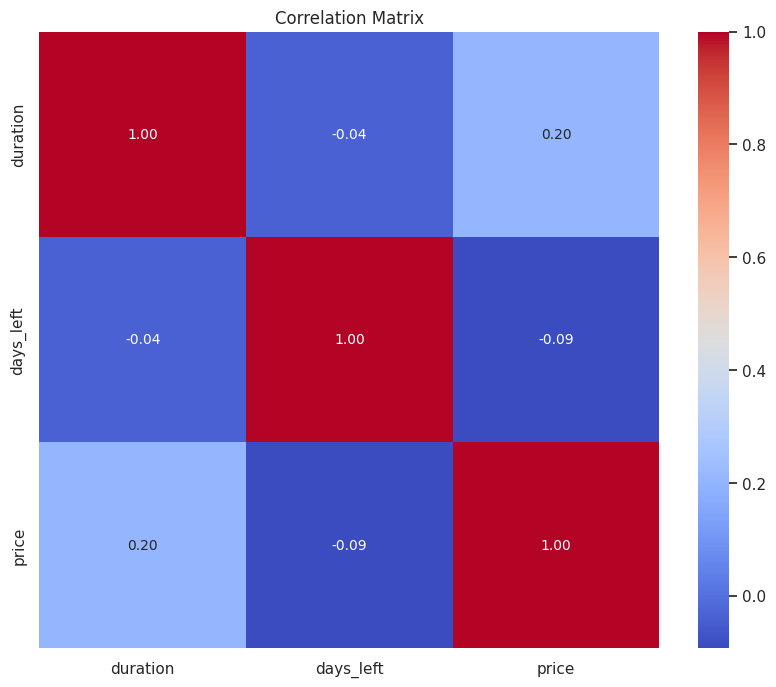

In [ ]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

the numerical colums aren't lineary correlated to the price.

This is because of the importance of the categorical features in our data, since information like class departure_city, stops , airline are more important to predict the flight price

In [ ]:
# Convert categorical variables into dummy variables and calculate correlations
data_dummies=pd.get_dummies(data,columns=["airline","source_city","departure_time","stops","arrival_time","destination_city","class"],drop_first=True)
data_dummies.corr()

# The 'pd.get_dummies()' function transforms categorical columns into binary indicators (dummy variables).
# 'drop_first=True' is used to prevent multicollinearity by dropping the first level of each categorical variable.
# After creating these dummies, 'df.corr()' computes the correlation matrix of the entire DataFrame.
# This correlation matrix includes correlations among numerical columns and the binary dummy variables
# representing categorical information, providing insights into their relationships.

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
duration,1.000000,-0.039157,0.204222,0.277283,-0.139380,-0.365953,0.008776,0.132430,0.033053,-0.049719,...,0.033094,-0.107301,0.122906,-0.064458,0.061271,-0.115412,0.065762,0.061440,-0.043900,-0.138710
days_left,-0.039157,1.000000,-0.091949,-0.022721,0.030408,0.007839,-0.024414,-0.007002,0.002581,-0.001292,...,-0.013737,0.026500,-0.003619,-0.004593,0.000456,0.006233,-0.000018,-0.003840,-0.004337,0.013039
price,0.204222,-0.091949,1.000000,0.070041,-0.194179,-0.280882,-0.114019,0.360816,0.018742,-0.043282,...,0.056408,-0.093602,0.030379,0.020344,0.018473,-0.052527,-0.008292,0.020956,0.010533,-0.937860
airline_Air_India,0.277283,-0.022721,0.070041,1.000000,-0.175687,-0.248781,-0.106858,-0.523242,-0.011600,0.009886,...,-0.040356,-0.059937,0.066735,-0.001920,0.005760,-0.017354,0.010900,-0.006201,0.042490,-0.124899
airline_GO_FIRST,-0.139380,0.030408,-0.194179,-0.175687,1.000000,-0.118471,-0.050886,-0.249171,-0.063273,0.030585,...,-0.043881,0.100450,-0.063926,-0.000382,-0.059581,0.034305,-0.025814,-0.001016,0.026916,0.194540
airline_Indigo,-0.365953,0.007839,-0.280882,-0.248781,-0.118471,1.000000,-0.072057,-0.352838,0.033626,-0.012615,...,0.007335,0.065025,-0.082781,-0.009271,0.018089,-0.002593,0.000244,0.033801,-0.031242,0.275477
airline_SpiceJet,0.008776,-0.024414,-0.114019,-0.106858,-0.050886,-0.072057,1.000000,-0.151553,0.003331,0.033040,...,-0.042162,0.003302,0.030808,0.013312,-0.002283,0.040668,-0.050272,0.029817,-0.000058,0.118325
airline_Vistara,0.132430,-0.007002,0.360816,-0.523242,-0.249171,-0.352838,-0.151553,1.000000,0.031174,-0.046163,...,0.091317,-0.135247,0.030260,0.024874,0.027766,-0.038389,0.035434,-0.030555,-0.016810,-0.302116
source_city_Chennai,0.033053,0.002581,0.018742,-0.011600,-0.063273,0.033626,0.003331,0.031174,1.000000,-0.194991,...,0.016559,0.009136,-0.024027,0.004418,-0.151660,0.060364,0.016905,0.015972,0.042960,-0.010204
source_city_Delhi,-0.049719,-0.001292,-0.043282,0.009886,0.030585,-0.012615,0.033040,-0.046163,-0.194991,1.000000,...,-0.025908,-0.028147,0.003773,-0.007427,0.061265,-0.246344,0.014093,0.040300,0.066721,0.014098


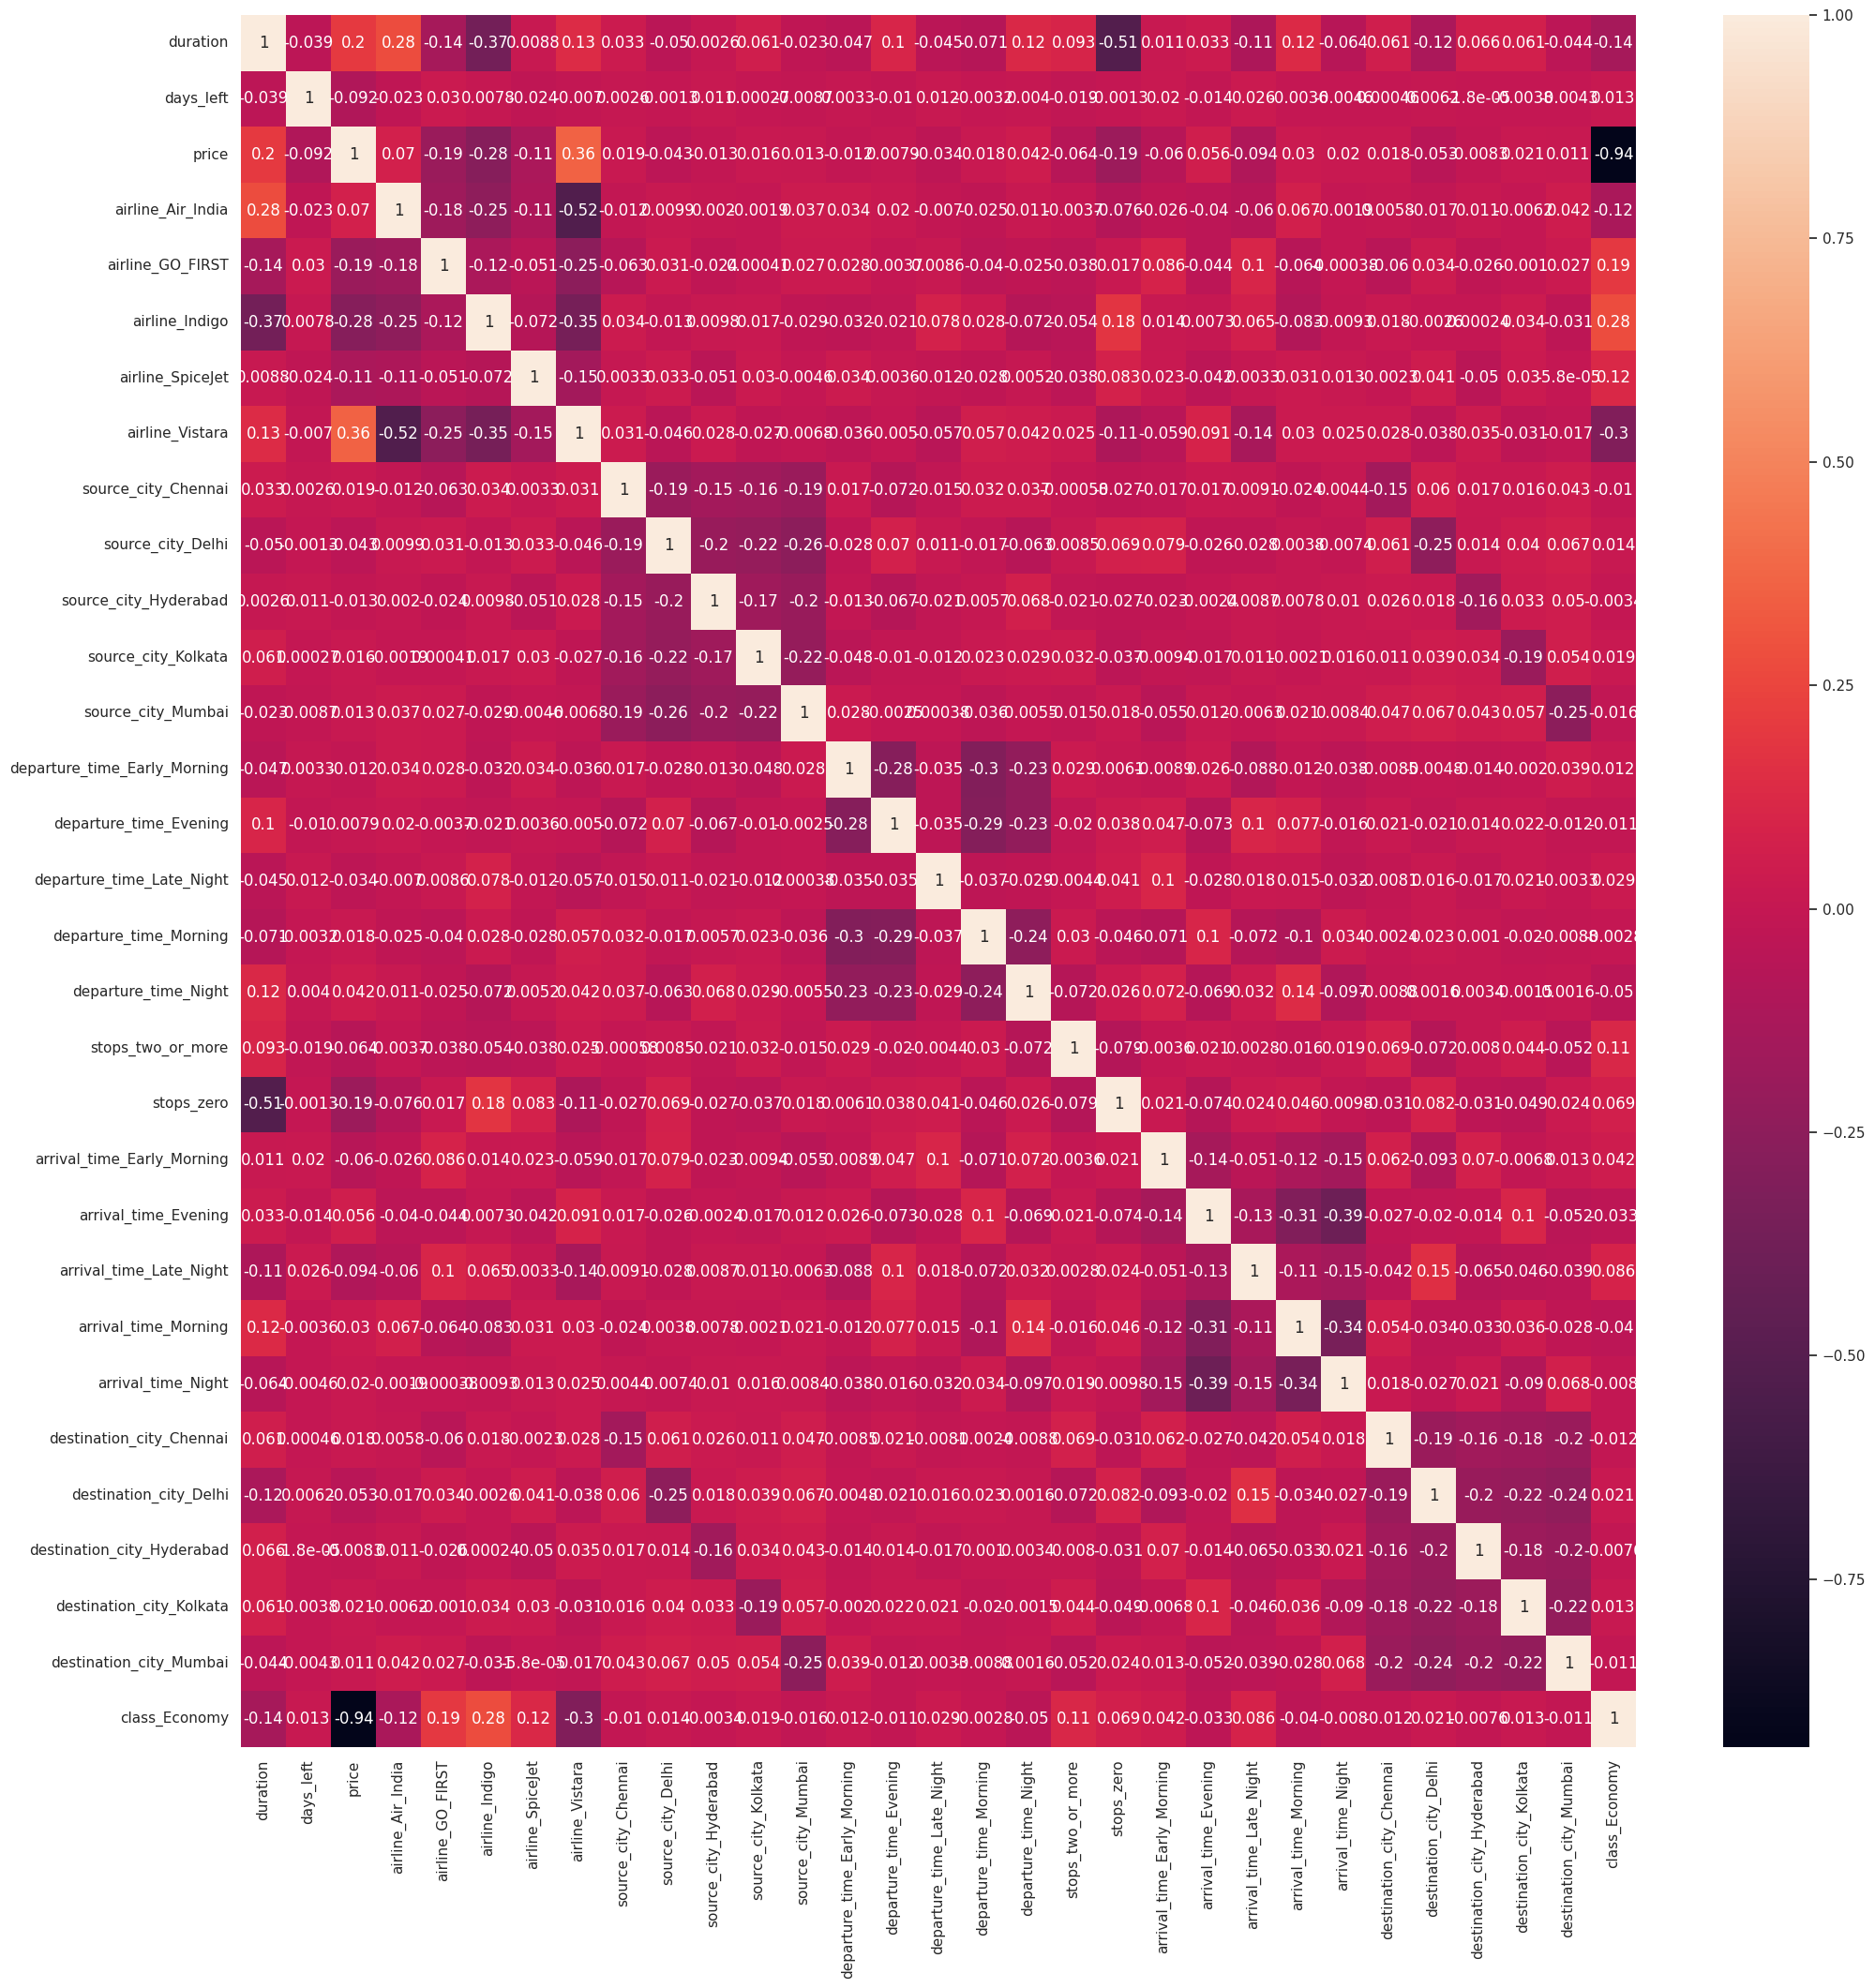

In [ ]:
#plot the heatMap
plt.figure(figsize=(24,24))
sns.heatmap(data_dummies.corr(),annot=True);

In [ ]:
#print features with high correlation
price_correlation = data_dummies.corr()["price"]
keys = price_correlation.keys()
correlated_features = { key:price_correlation[key] for key in keys  if abs(price_correlation[key]) >= 0.2 and key != "price"}
print(correlated_features)

{'duration': 0.20422236784543787, 'airline_Indigo': -0.28088208216949634, 'airline_Vistara': 0.3608161573520225, 'class_Economy': -0.9378603239058971}


As expected we can see correlations between the price and categorical features:

1.   Strong correlation: -0.94 between price and the economy calss
2.   moderate correlation: 0.36 between price and airline_Vistara

Note that airline_Indigo unlike, airline_Vistara, should be a lowcost airline since the correlation with price is negative and equal to **- 0.28**


#Preprocessing Pipeline

In [ ]:
x=data.drop("price",axis=1)
y=data["price"]


In [ ]:
oneHotEncoding_categories = ['airline', 'source_city', 'destination_city']
ordinalEncoding_categories = ['departure_time', 'arrival_time', 'stops', 'class']
numerical_categories = ["duration", "days_left"]
ordinal_categories_order = [['Late_Night', 'Afternoon', 'Night', 'Evening', 'Early_Morning', 'Morning'], ['Late_Night', 'Early_Morning', 'Afternoon', 'Night', 'Morning', 'Evening'], ['zero', 'two_or_more', 'one'], ['Economy', 'Business']]


In [ ]:
Preprocessing_pipeline = ColumnTransformer([
                               ('ordinalEncoding', OrdinalEncoder(categories=ordinal_categories_order), ordinalEncoding_categories),
                               ('std_scaler', StandardScaler(), numerical_categories),
                               ('oneHotEncoding', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
                               ], remainder='passthrough')
print(Preprocessing_pipeline)


ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalEncoding',
                                 OrdinalEncoder(categories=[['Late_Night',
                                                             'Afternoon',
                                                             'Night', 'Evening',
                                                             'Early_Morning',
                                                             'Morning'],
                                                            ['Late_Night',
                                                             'Early_Morning',
                                                             'Afternoon',
                                                             'Night', 'Morning',
                                                             'Evening'],
                                                            ['zero',
                                                             'two_or_more'

In [ ]:
data_prepared = Preprocessing_pipeline.fit_transform(x)
#split the prepared data
x_train,x_test,y_train,y_test=train_test_split(data_prepared,y,random_state=25,train_size=0.80)

# Apply ML pipeline

##Dummy Model

In [ ]:
#first test

model = DummyRegressor(strategy='mean')


# Fitting the model on the training data
model.fit(x_train, y_train)

# Predicting on the test data
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = m.sqrt(mse)
error_proportion= rmse/y.mean()
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"error_proportion: {error_proportion}")

Mean Squared Error: 511270612.0037068
R-squared: -3.559201802705303e-05
error_proportion: 1.0824155748607436


          airline source_city departure_time stops   arrival_time  \
242180  Air_India      Mumbai        Morning   one        Evening   
289548    Vistara     Chennai          Night   one        Morning   
181216     Indigo     Chennai  Early_Morning   one        Morning   
185319    Vistara     Chennai        Morning   one          Night   
245768  Air_India   Bangalore      Afternoon  zero      Afternoon   
190888  Air_India     Chennai        Morning   one        Morning   
43525   Air_India      Mumbai        Morning   one          Night   
182100   GO_FIRST     Chennai  Early_Morning   one      Afternoon   
16534     Vistara       Delhi        Evening  zero        Evening   
156083     Indigo   Hyderabad        Morning   one        Evening   
190507   SpiceJet     Chennai      Afternoon   one        Evening   
257410    Vistara   Bangalore        Evening   one          Night   
256804  Air_India   Bangalore        Evening   one        Morning   
39607    GO_FIRST       Delhi     

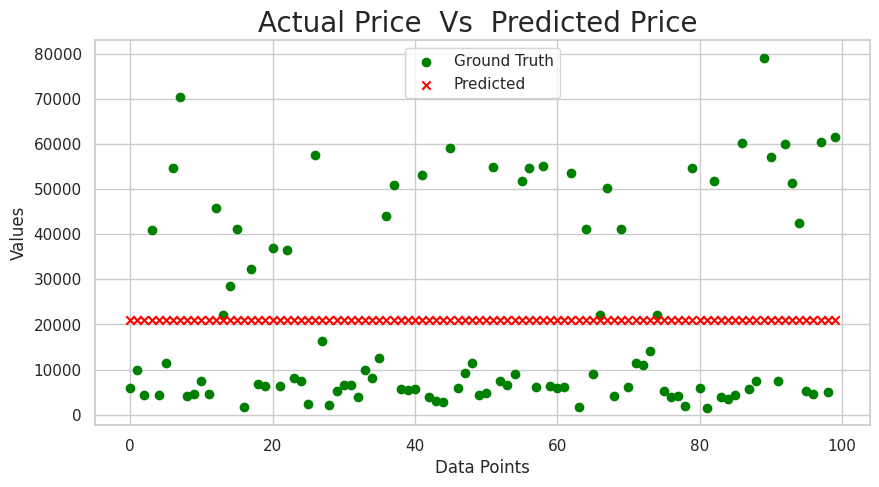

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=x.merge(out,left_index=True,right_index=True)
print(result.sample(20))

# Display the graphic between actual price and prediction price.
# Create a scatter plot
plt.figure(figsize=(10,5))
nb_points_to_show = 100
plt.scatter(range(nb_points_to_show), y_test[:nb_points_to_show], color='green', label='Ground Truth', marker='o')
plt.scatter(range(nb_points_to_show), y_pred[:nb_points_to_show], color='red', label='Predicted', marker='x')

# Add labels and title

plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

##Linear Regression Model

###Linear **Regression**

In [ ]:
#first test

model = LinearRegression()


# Fitting the model on the training data
model.fit(x_train, y_train)

# Predicting on the test data
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = m.sqrt(mse)
error_proportion= rmse/y.mean()
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"error_proportion: {error_proportion}")

Mean Squared Error: 45610928.96952824
R-squared: 0.9107858905174004
error_proportion: 0.32329804358708436


          airline source_city departure_time        stops arrival_time  \
246638    Vistara   Bangalore        Evening         zero        Night   
127344    AirAsia     Kolkata        Evening          one   Late_Night   
72424     Vistara      Mumbai        Evening          one      Evening   
91119     Vistara   Bangalore        Morning          one      Evening   
126202    Vistara     Kolkata        Evening         zero        Night   
181170  Air_India     Chennai      Afternoon          one        Night   
260134    Vistara   Bangalore        Evening          one      Morning   
78954      Indigo      Mumbai  Early_Morning          one    Afternoon   
286002  Air_India   Hyderabad          Night          one      Morning   
282338    Vistara   Hyderabad          Night          one      Morning   
45039   Air_India      Mumbai        Evening         zero        Night   
3658       Indigo       Delhi        Evening         zero      Evening   
74412    GO_FIRST      Mumbai        M

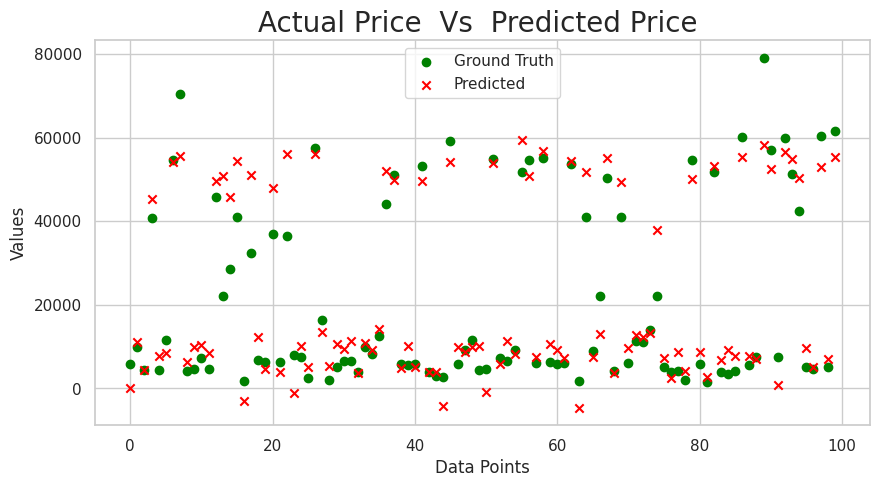

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=x.merge(out,left_index=True,right_index=True)
print(result.sample(20))
# Display the graphic between actual price and prediction price.
# Create a scatter plot
plt.figure(figsize=(10,5))
nb_points_to_show = 100
plt.scatter(range(nb_points_to_show), y_test[:nb_points_to_show], color='green', label='Ground Truth', marker='o')
plt.scatter(range(nb_points_to_show), y_pred[:nb_points_to_show], color='red', label='Predicted', marker='x')

# Add labels and title

plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
#cross_validation
full_pipeline = Pipeline([('preprocessor', Preprocessing_pipeline),
                          ('model', LinearRegression())])
linear_regression = cross_validate(full_pipeline, x, y, cv=10, scoring='neg_mean_squared_error', verbose=1, return_train_score=True, error_score='raise')
print(linear_regression)
mean_mse_test_set = (-1) * linear_regression["test_score"].mean()
rmse = m.sqrt(mean_mse_test_set)
error_proportion= rmse/y.mean()
print()
print(f"Mean of the mean squared error over the test set: {mean_mse_test_set}")
print(f"error_proportion: {error_proportion}")

{'fit_time': array([1.91600466, 1.83145499, 2.50234342, 1.79430103, 1.80799055,
       1.803473  , 2.46943355, 1.79898524, 1.81493688, 1.76440334]), 'score_time': array([0.15602994, 0.13763022, 0.15237522, 0.13868141, 0.14322448,
       0.1380837 , 0.1427803 , 0.15270829, 0.13794971, 0.14279056]), 'test_score': array([-2.13935206e+07, -1.60564859e+07, -1.67499036e+07, -1.56732732e+07,
       -2.25960422e+07, -1.77901355e+07, -3.41420145e+07, -1.41542014e+08,
       -1.28845531e+08, -1.09086367e+08]), 'train_score': array([-48744250.35850698, -49096038.88585893, -49053446.54470093,
       -49142276.71705203, -48923325.45920974, -49112917.06675107,
       -47153320.31020812, -36027207.43147263, -37108354.51560869,
       -38858460.93737645])}

Mean of the mean squared error over the test set: 52387528.66435619
error_proportion: 0.34648351247013465


The obtained R-squared value of 0.911 suggests that the model explains around 91.1% of the variance in the target variable using the provided features.
However, the MSE of 5481.24 indicates that the model's predictions still have some level of average deviation from the actual values

We will try to improve those metrics and apply other models

### Linear Regression with Regularization term

####Ridge

In [ ]:
#first test

model = Ridge()

# Fitting the model on the training data
model.fit(x_train, y_train)

# Predicting on the test data
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = m.sqrt(mse)
error_proportion= rmse/y.mean()
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"error_proportion: {error_proportion}")

Mean Squared Error: 45609886.78729668
R-squared: 0.9107879290060217
error_proportion: 0.3232943499832831


          airline source_city departure_time stops   arrival_time  \
281165    Vistara   Hyderabad      Afternoon   one          Night   
79327     Vistara      Mumbai          Night   one          Night   
207796  Air_India       Delhi        Morning   one          Night   
41482    GO_FIRST       Delhi        Morning   one     Late_Night   
281643    Vistara   Hyderabad      Afternoon   one          Night   
78451   Air_India      Mumbai  Early_Morning   one  Early_Morning   
156892  Air_India   Hyderabad        Morning   one        Evening   
162925    Vistara   Hyderabad        Morning   one          Night   
58120      Indigo      Mumbai  Early_Morning   one        Morning   
67966      Indigo      Mumbai        Evening   one          Night   
116134  Air_India   Bangalore  Early_Morning   one          Night   
158358     Indigo   Hyderabad      Afternoon   one     Late_Night   
231459    Vistara      Mumbai        Morning   one          Night   
201670    Vistara     Chennai     

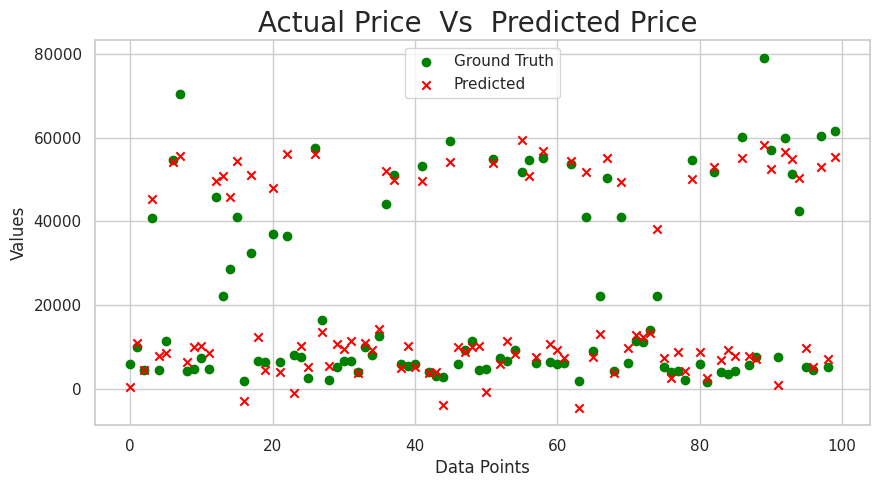

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=x.merge(out,left_index=True,right_index=True)
print(result.sample(20))
# Display the graphic between actual price and prediction price.
# Create a scatter plot
plt.figure(figsize=(10,5))
nb_points_to_show = 100
plt.scatter(range(nb_points_to_show), y_test[:nb_points_to_show], color='green', label='Ground Truth', marker='o')
plt.scatter(range(nb_points_to_show), y_pred[:nb_points_to_show], color='red', label='Predicted', marker='x')

# Add labels and title

plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
full_pipeline = Pipeline([('preprocessor', Preprocessing_pipeline),
                          ('model', Ridge())])
ridge = cross_validate(full_pipeline, x, y, cv=10, scoring='neg_mean_squared_error', verbose=1, return_train_score=True, error_score='raise')
print(ridge)
mean_mse_test_set = (-1) * ridge["test_score"].mean()
rmse = m.sqrt(mean_mse_test_set)
error_proportion= rmse/y.mean()
print()
print(f"Mean of the mean squared error over the test set: {mean_mse_test_set}")
print(f"error_proportion: {error_proportion}")

{'fit_time': array([1.28261876, 2.04211426, 1.18346667, 1.15598655, 1.1630156 ,
       1.17008877, 2.0680685 , 1.17149544, 1.18272638, 1.18447518]), 'score_time': array([0.23778105, 0.16620207, 0.15974188, 0.16377139, 0.16256928,
       0.16913581, 0.24932456, 0.15742397, 0.15554237, 0.16071272]), 'test_score': array([ -2571.18594905,  -1929.64432168,  -2013.23561797,  -1880.73769676,
        -2708.25622029,  -2137.77198148,  -4103.17513701, -17010.18025159,
       -15488.32723525, -13115.12982555]), 'train_score': array([-5857.87040748, -5900.1903183 , -5895.07385927, -5905.75769862,
       -5879.46677058, -5902.09380169, -5666.71196306, -4329.62699241,
       -4459.51258469, -4669.87068567])}

Mean of the mean squared error over the test set: 6295.764423663436
error_proportion: 0.34648378909623206


####ElasticNET

In [ ]:
#first test

model = ElasticNet()

# Fitting the model on the training data
model.fit(x_train, y_train)

# Predicting on the test data
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = m.sqrt(mse)
error_proportion= rmse/y.mean()
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"error_proportion: {error_proportion}")

Mean Squared Error: 167279228.0912421
R-squared: 0.6728050117315738
error_proportion: 0.6191410873327551


          airline source_city departure_time        stops arrival_time  \
116469    Vistara   Bangalore  Early_Morning          one        Night   
28641      Indigo       Delhi      Afternoon          one        Night   
82696      Indigo      Mumbai        Evening          one        Night   
223116  Air_India       Delhi  Early_Morning          one      Evening   
161421  Air_India   Hyderabad        Evening          one      Morning   
96105     AirAsia   Bangalore          Night          one   Late_Night   
68734   Air_India      Mumbai        Evening          one    Afternoon   
59796     Vistara      Mumbai  Early_Morning          one      Morning   
223426  Air_India       Delhi  Early_Morning          one      Morning   
217321    Vistara       Delhi      Afternoon          one      Evening   
5683    Air_India       Delhi        Evening          one        Night   
4802    Air_India       Delhi        Evening          one      Evening   
140988    Vistara     Kolkata  Early_M

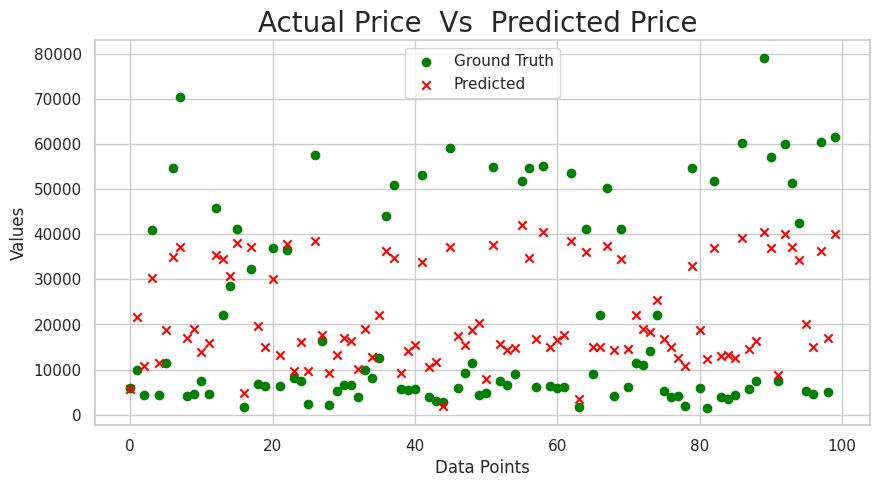

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=x.merge(out,left_index=True,right_index=True)
print(result.sample(20))
# Display the graphic between actual price and prediction price.
# Create a scatter plot
plt.figure(figsize=(10,5))
nb_points_to_show = 100
plt.scatter(range(nb_points_to_show), y_test[:nb_points_to_show], color='green', label='Ground Truth', marker='o')
plt.scatter(range(nb_points_to_show), y_pred[:nb_points_to_show], color='red', label='Predicted', marker='x')

# Add labels and title

plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
full_pipeline = Pipeline([('preprocessor', Preprocessing_pipeline),
                          ('model', ElasticNet())])
elastic_net = cross_validate(full_pipeline, x, y, cv=10, scoring='neg_mean_squared_error', verbose=1, return_train_score=True, error_score='raise')
print(elastic_net)
mean_mse_test_set = (-1) * elastic_net["test_score"].mean()
rmse = m.sqrt(mean_mse_test_set)
error_proportion= rmse/y.mean()
print()
print(f"Mean of the mean squared error over the test set: {mean_mse_test_set}")
print(f"error_proportion: {error_proportion}")

{'fit_time': array([1.60073781, 1.41036391, 1.42123556, 1.45369768, 3.17578959,
       2.18592453, 2.65073943, 4.09357119, 3.11192608, 2.04957557]), 'score_time': array([0.16049314, 0.16245723, 0.17246962, 0.16576147, 0.3579433 ,
       0.2420485 , 0.24304605, 0.53269386, 0.39422965, 0.26465917]), 'test_score': array([-8.47333003e+07, -8.22687212e+07, -1.04738429e+08, -8.38973877e+07,
       -9.10692058e+07, -1.10189398e+08, -1.19438188e+08, -5.19415352e+08,
       -6.47307068e+08, -5.39204307e+08]), 'train_score': array([-1.73474692e+08, -1.73603678e+08, -1.71790724e+08, -1.72937106e+08,
       -1.72488100e+08, -1.71988552e+08, -1.71168750e+08, -1.57723495e+08,
       -1.52685295e+08, -1.58935997e+08])}

Mean of the mean squared error over the test set: 238226135.77793974
error_proportion: 0.7388619822712281


####Lasso

In [ ]:
#first test

model = Lasso()

# Fitting the model on the training data
model.fit(x_train, y_train)

# Predicting on the test data
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = m.sqrt(mse)
error_proportion= rmse/y.mean()
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"error_proportion: {error_proportion}")

Mean Squared Error: 45610834.186945856
R-squared: 0.9107860759103288
error_proportion: 0.32329770766935517


          airline source_city departure_time        stops arrival_time  \
146820    AirAsia     Kolkata        Evening  two_or_more      Morning   
122245    AirAsia     Kolkata        Evening          one      Morning   
288255    Vistara     Chennai  Early_Morning          one      Evening   
229343    Vistara      Mumbai        Morning          one        Night   
69382   Air_India      Mumbai      Afternoon          one      Evening   
194923     Indigo     Chennai        Evening         zero      Evening   
259319    Vistara   Bangalore        Evening          one      Morning   
175459    Vistara   Hyderabad        Morning          one      Morning   
37753     Vistara       Delhi      Afternoon  two_or_more        Night   
176448  Air_India   Hyderabad        Morning  two_or_more        Night   
33180     Vistara       Delhi        Morning         zero    Afternoon   
181110     Indigo     Chennai        Morning         zero      Morning   
295014    Vistara     Chennai        M

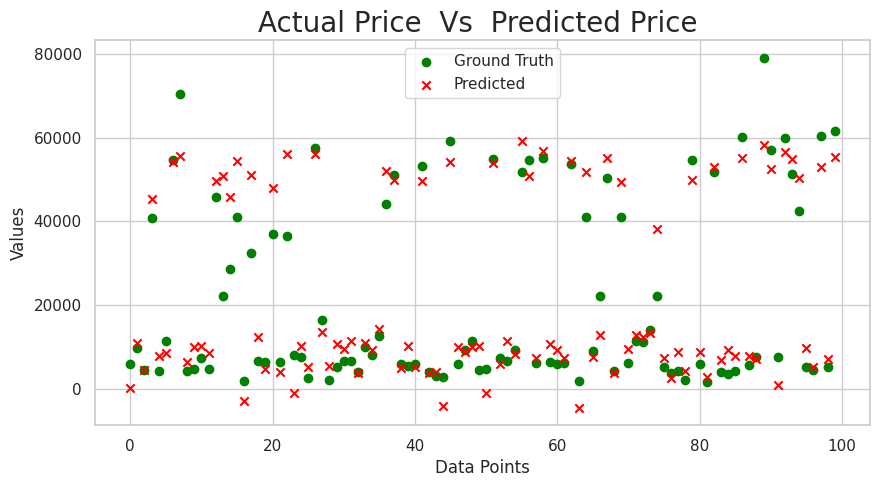

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=x.merge(out,left_index=True,right_index=True)
print(result.sample(20))
# Display the graphic between actual price and prediction price.
# Create a scatter plot
plt.figure(figsize=(10,5))
nb_points_to_show = 100
plt.scatter(range(nb_points_to_show), y_test[:nb_points_to_show], color='green', label='Ground Truth', marker='o')
plt.scatter(range(nb_points_to_show), y_pred[:nb_points_to_show], color='red', label='Predicted', marker='x')

# Add labels and title

plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
full_pipeline = Pipeline([('preprocessor', Preprocessing_pipeline),
                          ('model', Lasso())])
Lasso = cross_validate(full_pipeline, x, y, cv=10, scoring='neg_mean_squared_error', verbose=1, return_train_score=True, error_score='raise')
print(Lasso)
mean_mse_test_set = (-1) * Lasso["test_score"].mean()
rmse = m.sqrt(mean_mse_test_set)
error_proportion= rmse/y.mean()
print()
print(f"Mean of the mean squared error over the test set: {mean_mse_test_set}")
print(f"error_proportion: {error_proportion}")

{'fit_time': array([12.76655221, 12.93695855, 15.67231679, 12.47971869, 12.81982303,
       13.00604177, 13.15002489, 10.76823235,  9.15033221, 10.65146971]), 'score_time': array([0.1562438 , 0.15905881, 0.15736341, 0.15538406, 0.15644383,
       0.15853667, 0.16022587, 0.25536084, 0.16039467, 0.15832782]), 'test_score': array([-2.13154240e+07, -1.59570302e+07, -1.66589587e+07, -1.55063828e+07,
       -2.23783993e+07, -1.76531586e+07, -3.40677184e+07, -1.41658679e+08,
       -1.28992544e+08, -1.09160166e+08]), 'train_score': array([-48744777.64029188, -49096997.45543251, -49054275.48844665,
       -49143635.99309877, -48924448.80434987, -49112707.35273546,
       -47154015.76816977, -36028323.9866147 , -37109166.73955192,
       -38859550.7853531 ])}

Mean of the mean squared error over the test set: 52334846.07755296
error_proportion: 0.3463092511563248


##RandomForestRegressor

In [ ]:
#first test

model = RandomForestRegressor()

# Fitting the model on the training data
model.fit(x_train, y_train)

# Predicting on the test data
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = m.sqrt(mse)
error_proportion= rmse/y.mean()
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"error_proportion: {error_proportion}")

Mean Squared Error: 7561777.321155075
R-squared: 0.9852093073950924
error_proportion: 0.1316377830870895


          airline source_city departure_time        stops arrival_time  \
247710    Vistara   Bangalore        Evening          one   Late_Night   
94105     Vistara   Bangalore        Morning          one        Night   
59291     Vistara      Mumbai      Afternoon          one      Morning   
33441   Air_India       Delhi          Night          one        Night   
48736     Vistara      Mumbai  Early_Morning          one      Evening   
111123    Vistara   Bangalore      Afternoon  two_or_more    Afternoon   
42549     Vistara       Delhi  Early_Morning          one        Night   
189426     Indigo     Chennai          Night         zero   Late_Night   
67634     Vistara      Mumbai  Early_Morning          one      Evening   
208526  Air_India       Delhi  Early_Morning          one    Afternoon   
283621    Vistara   Hyderabad        Morning          one      Evening   
115615    Vistara   Bangalore  Early_Morning          one      Evening   
285073    Vistara   Hyderabad        M

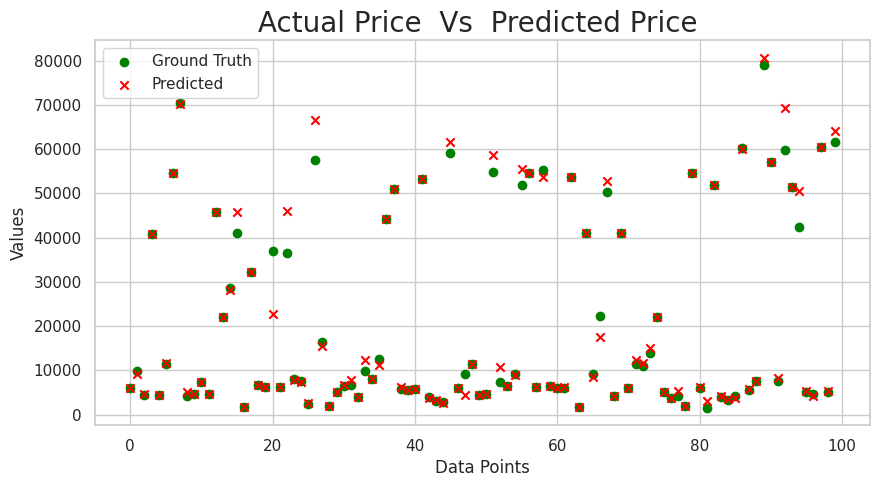

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=x.merge(out,left_index=True,right_index=True)
print(result.sample(20))
# Display the graphic between actual price and prediction price.
# Create a scatter plot
plt.figure(figsize=(10,5))
nb_points_to_show = 100
plt.scatter(range(nb_points_to_show), y_test[:nb_points_to_show], color='green', label='Ground Truth', marker='o')
plt.scatter(range(nb_points_to_show), y_pred[:nb_points_to_show], color='red', label='Predicted', marker='x')

# Add labels and title

plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
#cross_validate
full_pipeline = Pipeline([('preprocessor', Preprocessing_pipeline),
                          ('model', RandomForestRegressor())])
randomForestRegressor = cross_validate(full_pipeline, x, y, cv=10, scoring="neg_mean_squared_error", verbose=1, return_train_score=True, error_score='raise')

In [52]:
print(randomForestRegressor)
mean_mse_test_set = (-1) * randomForestRegressor["test_score"].mean()
rmse = m.sqrt(mean_mse_test_set)
error_proportion= rmse/y.mean()
print()
print(f"Mean of the mean squared error over the test set: {mean_mse_test_set}")
print(f"error_proportion: {error_proportion}")

{'fit_time': array([128.39635849, 128.49371338, 128.68632269, 130.27641368,
       130.46338463, 131.92952466, 130.02959728, 138.90775943,
       132.56014895, 129.4186058 ]), 'score_time': array([0.58324552, 0.57689977, 0.58805633, 0.80779457, 0.55720615,
       0.61581874, 0.72934628, 0.39220405, 0.44512773, 0.4369421 ]), 'test_score': array([-5.59491950e+06, -4.96969492e+06, -6.10491672e+06, -4.40778742e+06,
       -7.32256944e+06, -4.78028471e+06, -9.63989344e+06, -1.06158176e+08,
       -8.30746938e+07, -9.06751191e+07]), 'train_score': array([-1442454.74026623, -1434309.77361055, -1451293.27201595,
       -1442667.58657796, -1435554.33050209, -1453774.92454014,
       -1391112.97553155, -1085820.34695765, -1009656.84708233,
       -1102477.29115256])}

Mean of the mean squared error over the test set: 32272805.489465903
error_proportion: 0.27194869423797097


##Polynomial model


In [ ]:
x_poly = x.copy()
print(x_poly)
x_poly = Preprocessing_pipeline.fit_transform(x_poly)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x_poly)
print(x_poly.shape)
x_poly[0]
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,random_state=25,train_size=0.80)

         airline source_city departure_time stops   arrival_time  \
0       SpiceJet       Delhi        Evening  zero          Night   
1       SpiceJet       Delhi  Early_Morning  zero        Morning   
2        AirAsia       Delhi  Early_Morning  zero  Early_Morning   
3        Vistara       Delhi        Morning  zero      Afternoon   
4        Vistara       Delhi        Morning  zero        Morning   
...          ...         ...            ...   ...            ...   
300148   Vistara     Chennai        Morning   one        Evening   
300149   Vistara     Chennai      Afternoon   one          Night   
300150   Vistara     Chennai  Early_Morning   one          Night   
300151   Vistara     Chennai  Early_Morning   one        Evening   
300152   Vistara     Chennai        Morning   one        Evening   

       destination_city     class  duration  days_left  
0                Mumbai   Economy      2.17          1  
1                Mumbai   Economy      2.33          1  
2           

In [54]:
#first test

model = Ridge()

# Fitting the model on the training data
model.fit(x_train, y_train)

# Predicting on the test data
y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = m.sqrt(mse)
error_proportion= rmse/y.mean()
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"error_proportion: {error_proportion}")

Mean Squared Error: 25439268.072425555
R-squared: 0.9502412755397548
error_proportion: 0.24144650517511454


          airline source_city departure_time        stops   arrival_time  \
59804      Indigo      Mumbai        Morning          one      Afternoon   
244745    Vistara      Mumbai          Night          one        Morning   
95342      Indigo   Bangalore      Afternoon          one        Evening   
69925    SpiceJet      Mumbai  Early_Morning          one          Night   
37021      Indigo       Delhi  Early_Morning          one        Morning   
126555  Air_India     Kolkata        Evening          one      Afternoon   
286891    Vistara   Hyderabad      Afternoon          one          Night   
148909    AirAsia     Kolkata  Early_Morning          one        Morning   
137763  Air_India     Kolkata        Morning          one        Evening   
233752    Vistara      Mumbai        Morning          one          Night   
255520  Air_India   Bangalore     Late_Night         zero  Early_Morning   
124256   GO_FIRST     Kolkata        Morning  two_or_more        Evening   
33921    GO_

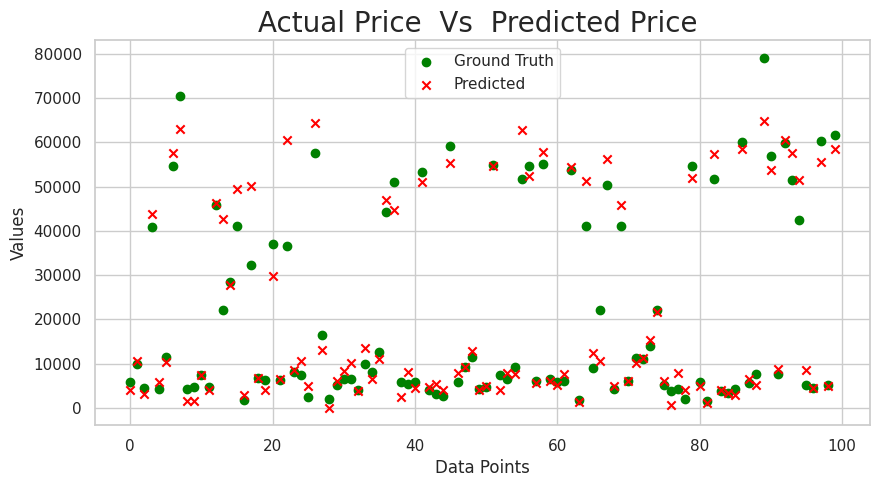

In [55]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=x.merge(out,left_index=True,right_index=True)
print(result.sample(20))
# Display the graphic between actual price and prediction price.
# Create a scatter plot
plt.figure(figsize=(10,5))
nb_points_to_show = 100
plt.scatter(range(nb_points_to_show), y_test[:nb_points_to_show], color='green', label='Ground Truth', marker='o')
plt.scatter(range(nb_points_to_show), y_pred[:nb_points_to_show], color='red', label='Predicted', marker='x')

# Add labels and title

plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [56]:
#cross_validation
non_linear_regression = cross_validate(Ridge(), x_poly, y, cv=10, scoring='neg_mean_squared_error', verbose=1, return_train_score=True, error_score='raise')


In [57]:
print(non_linear_regression)
mean_mse_test_set = (-1) * non_linear_regression["test_score"].mean()
rmse = m.sqrt(mean_mse_test_set)
error_proportion= rmse/y.mean()
print()
print(f"Mean of the mean squared error over the test set: {mean_mse_test_set}")
print(f"error_proportion: {error_proportion}")

{'fit_time': array([7.16069174, 5.43162727, 7.02660918, 5.42624831, 7.12774348,
       5.3799808 , 6.99419665, 5.41494203, 7.11993265, 5.44650602]), 'score_time': array([0.03135991, 0.0370636 , 0.03204226, 0.05498266, 0.04550266,
       0.0318706 , 0.03177691, 0.0327704 , 0.03209925, 0.0554688 ]), 'test_score': array([-3.39810607e+07, -2.58124707e+07, -1.21435850e+07, -2.21818120e+07,
       -1.80452498e+07, -1.43665555e+07, -4.16537072e+07, -1.05307340e+08,
       -8.35706200e+07, -8.64448539e+07]), 'train_score': array([-26544461.22618604, -26717047.83990881, -27036574.7837222 ,
       -26858214.20944514, -26934366.76885045, -27060975.94359313,
       -25582093.01597321, -20349060.68043788, -20047940.35963312,
       -19924123.99625101])}

Mean of the mean squared error over the test set: 44350725.45391165
error_proportion: 0.31880049106861463
